In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample, convolve

In [2]:
PERIOD = 550

In [5]:
Y = pd.read_csv("beijing_temperature_original.csv", header=None).to_numpy()
Y

array([[ -10,    5,   10, ...,  156,  181,  176],
       [ -29,  -29,  -34, ...,  146,  166,  171],
       [ -20,  -34,  -44, ...,  -10,  -15,   -5],
       ...,
       [ -34,  -39,  -34, ...,  342,  356,  361],
       [-112, -122, -127, ...,  273,  288,  298],
       [   5,    0,   -5, ...,  351,  366,  371]])

In [6]:
Y = resample(Y, 1500, axis=1)
Y = np.round(Y)
Y = ((Y.T - Y.T.mean(axis=0)) / (Y.T.std(axis=0))).T
kernel = 0.2 * np.ones(4)
# smoothed_ecg = np.zeros_like(Y)
for i in range(12):
    Y[i] = convolve(Y[i], kernel, mode="same")
# Y = ((Y.T - Y.T.mean(axis=0)) / (Y.T.std(axis=0))).T
Y.shape

(12, 1500)

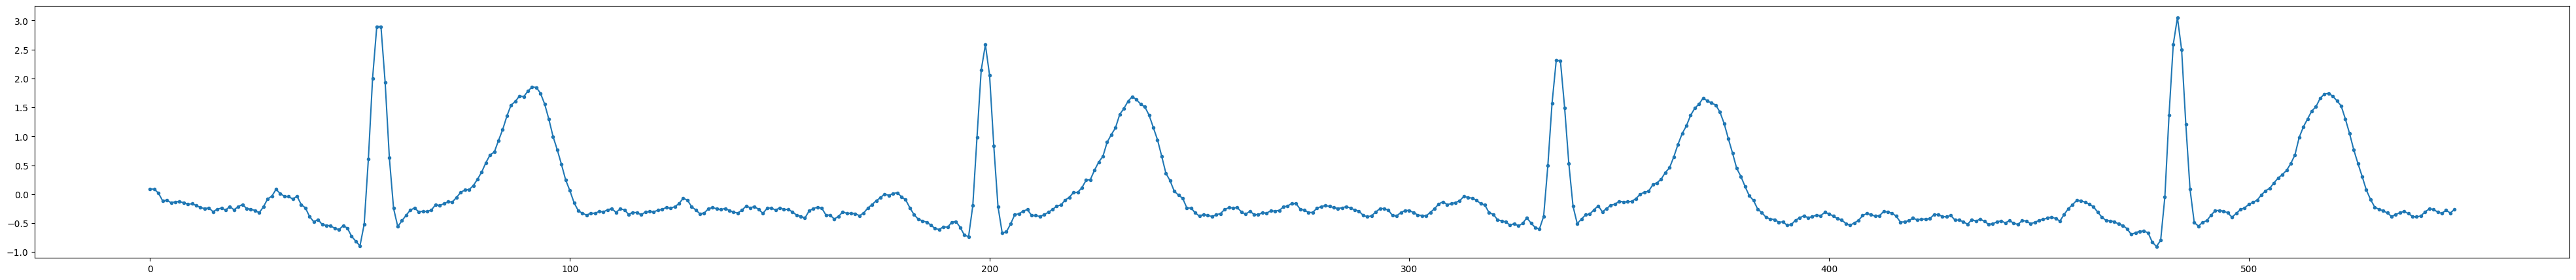

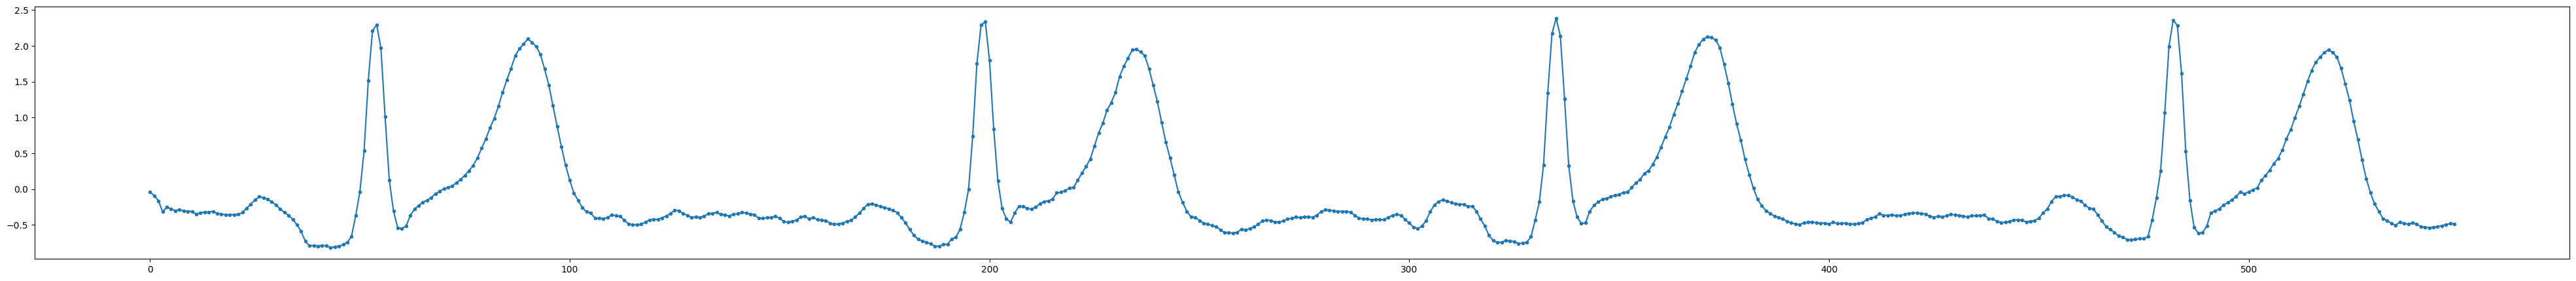

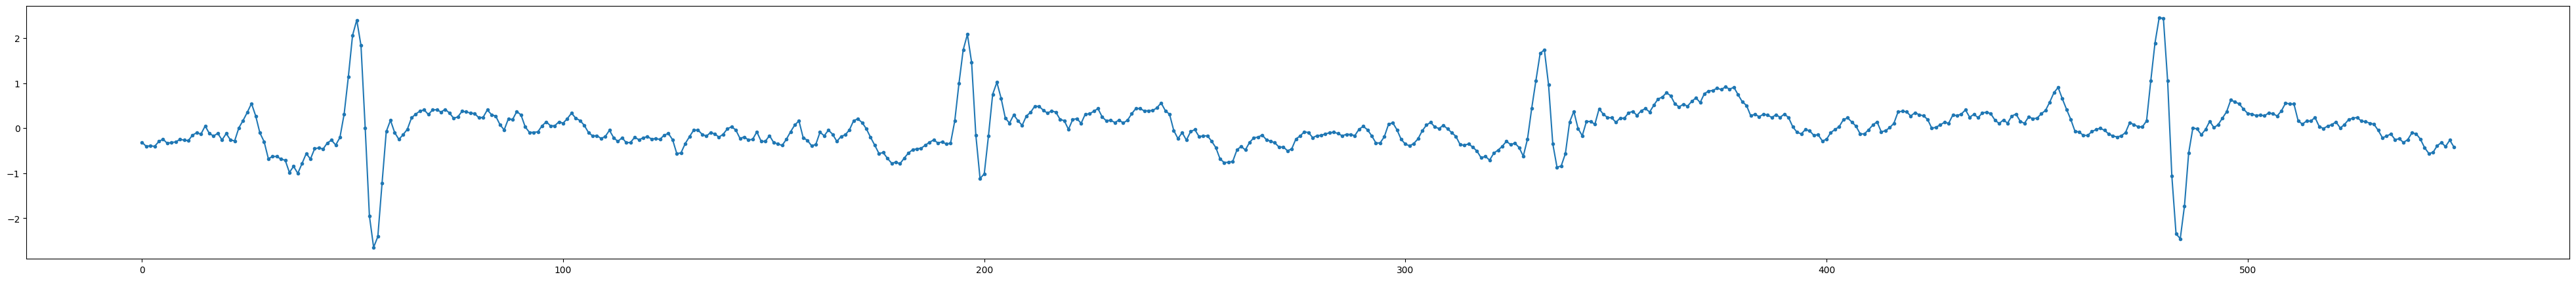

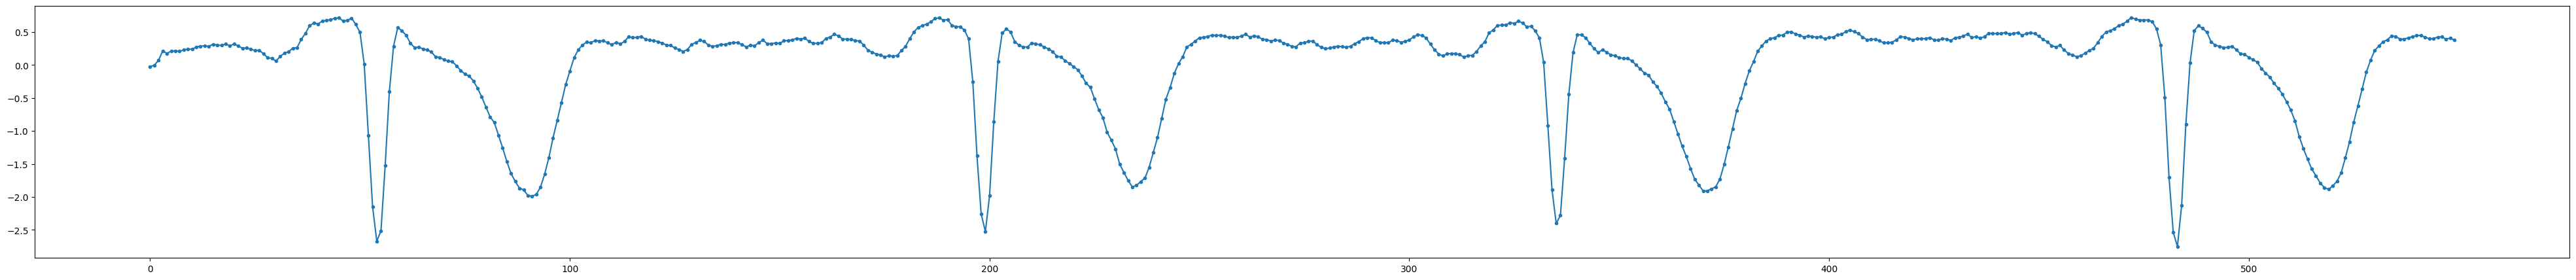

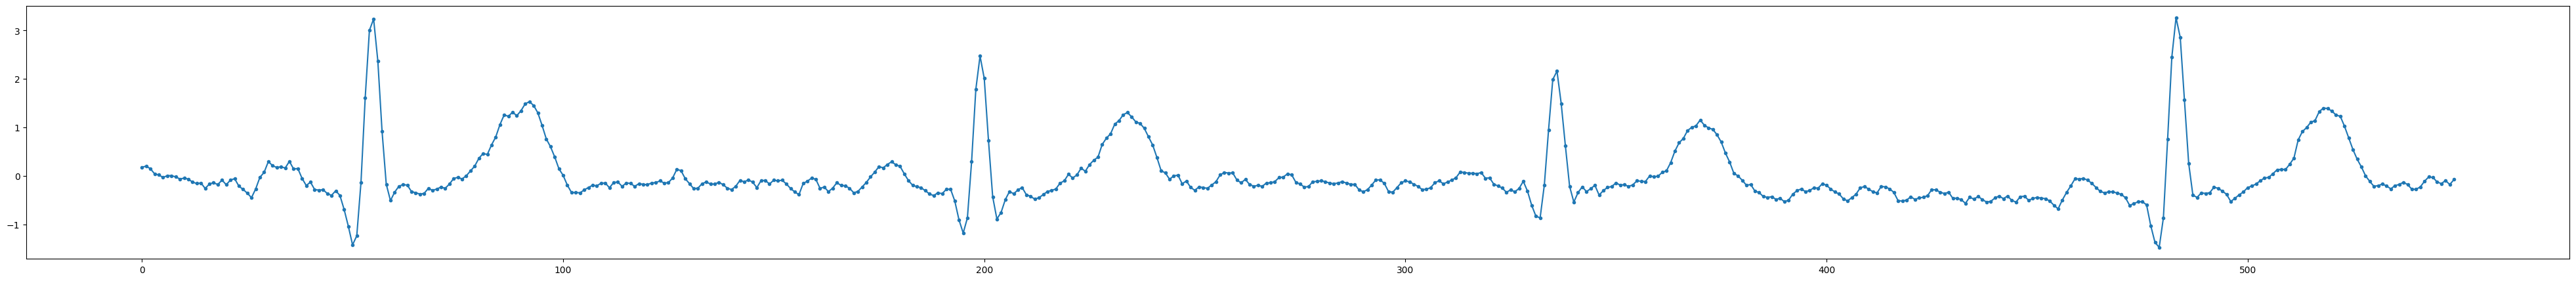

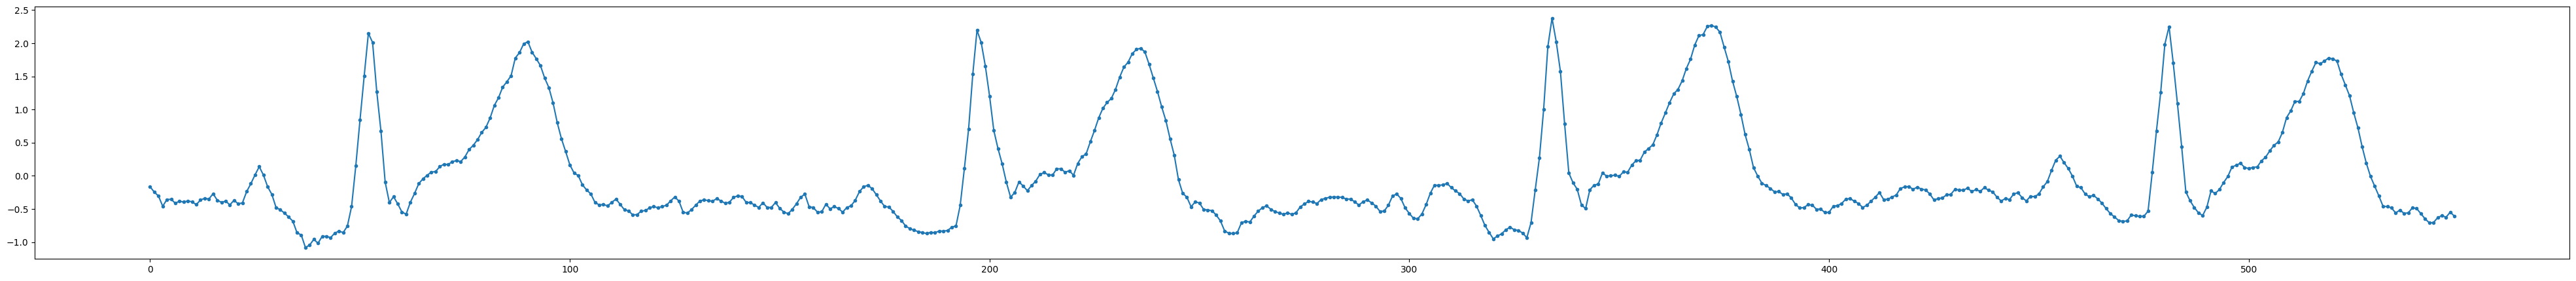

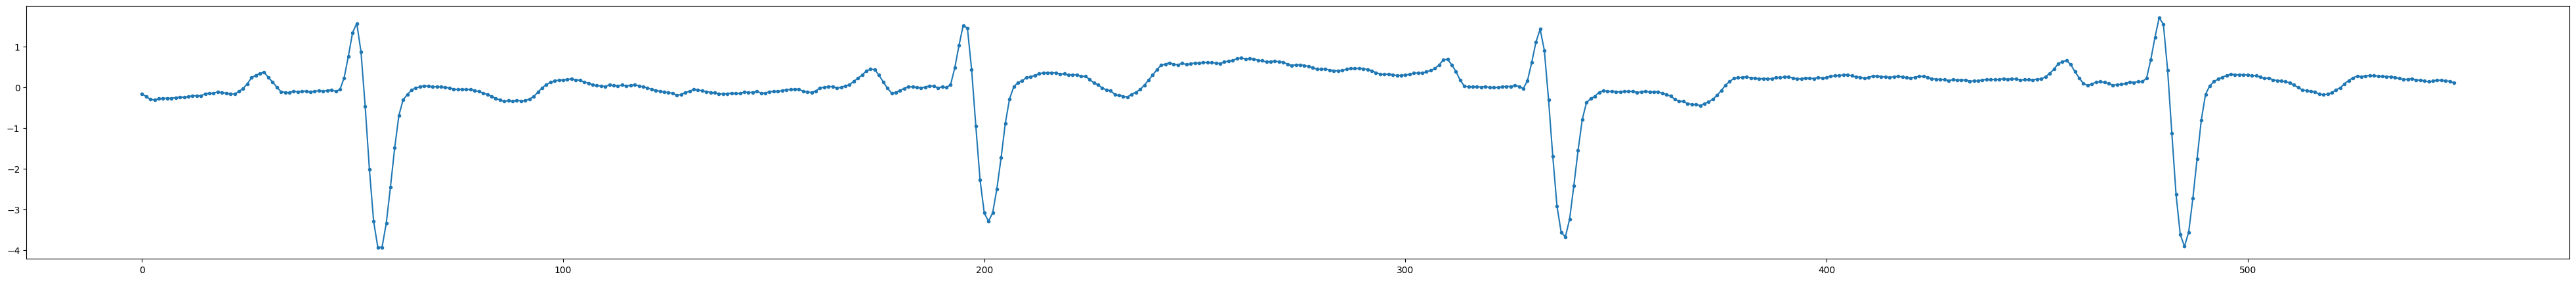

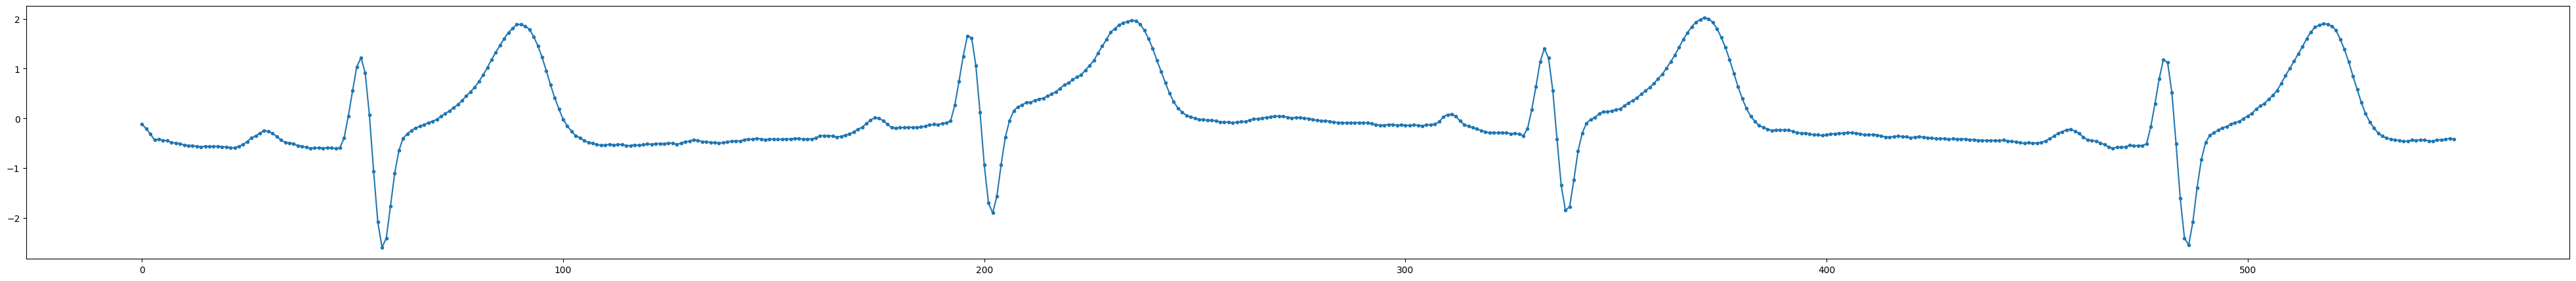

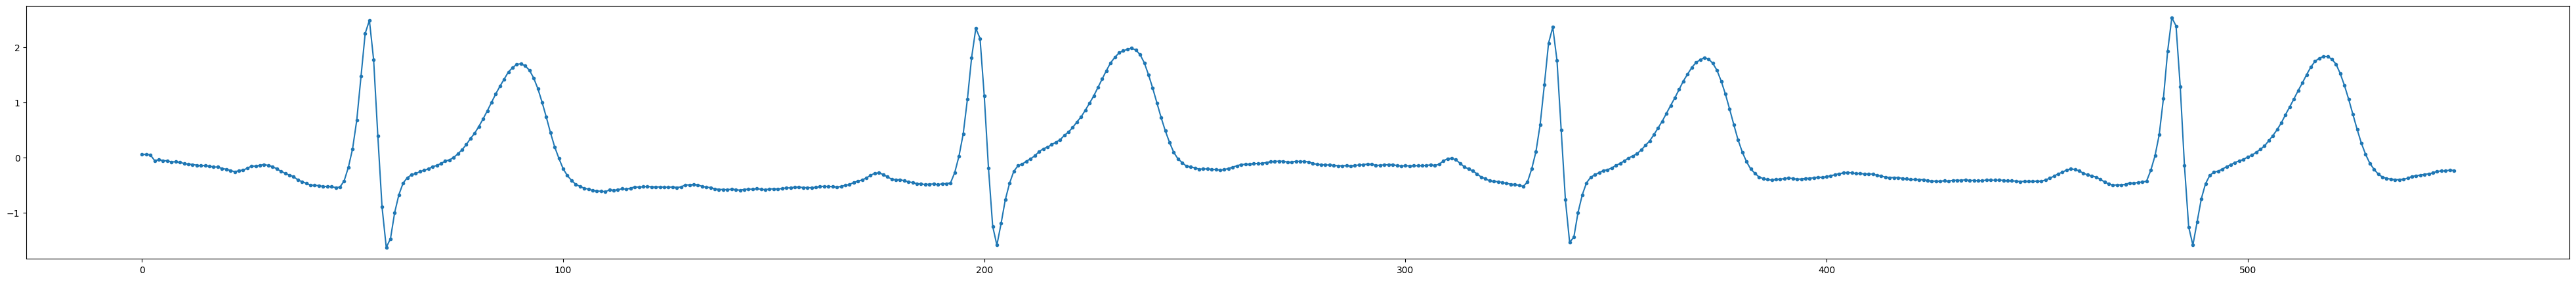

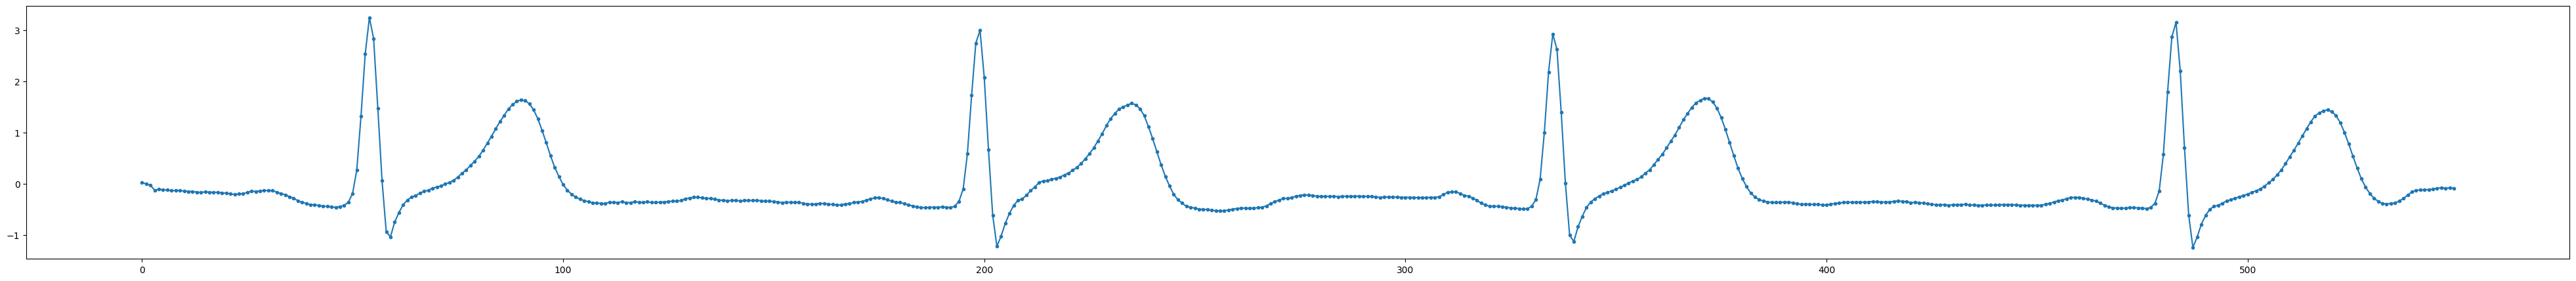

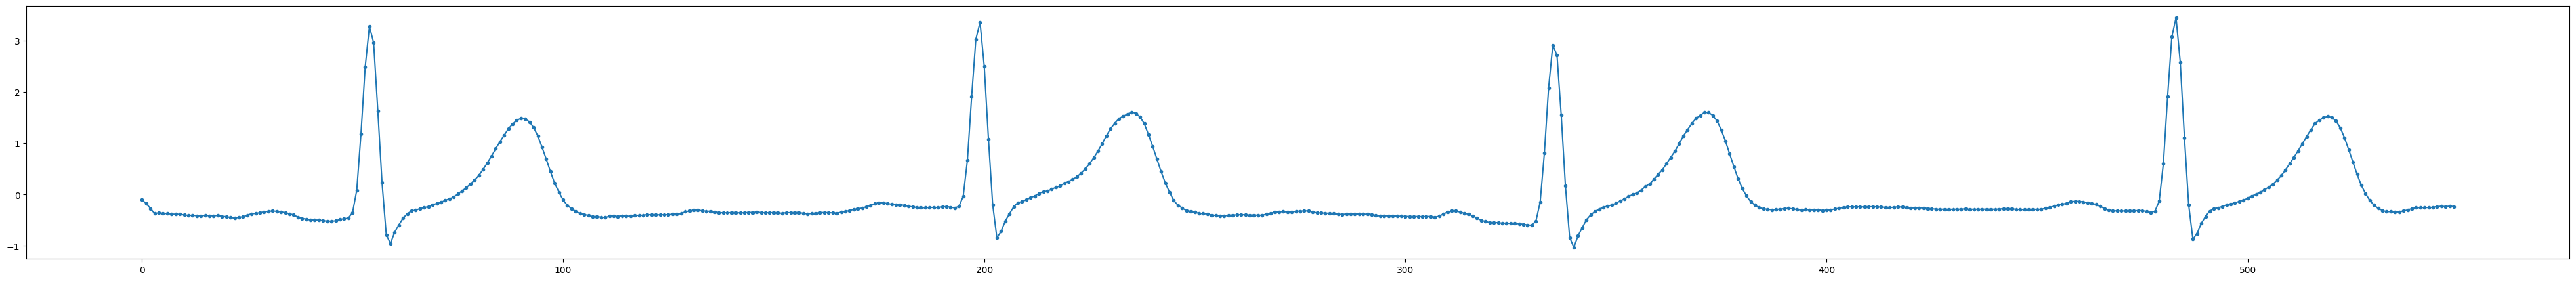

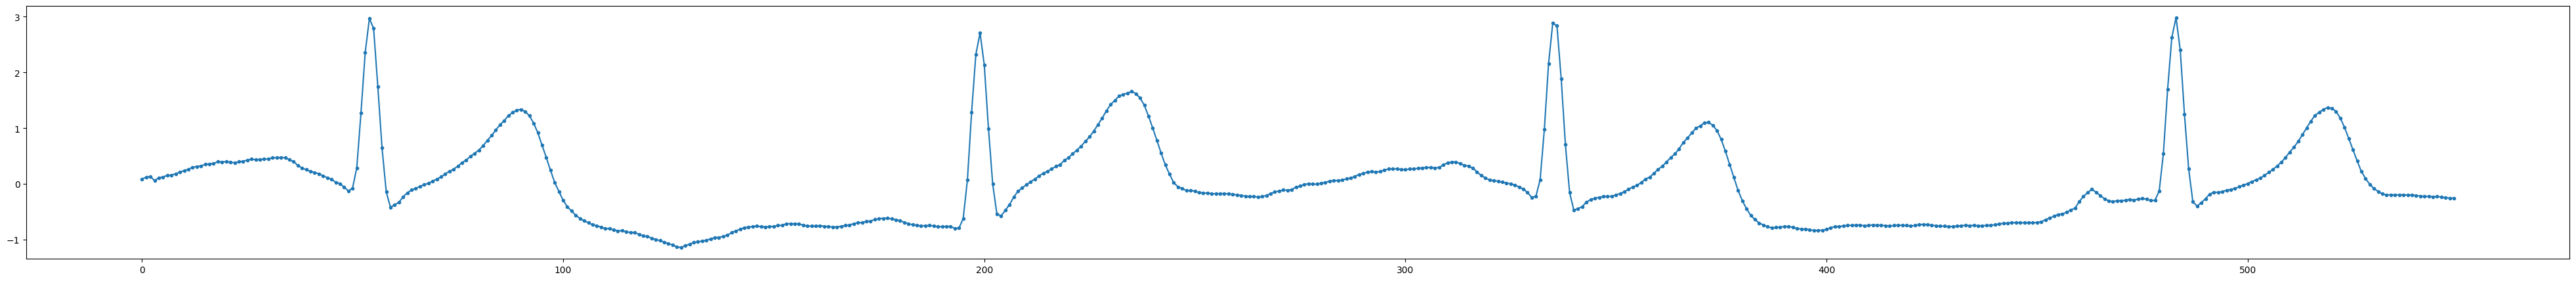

In [7]:
for i in range(12):
    plt.figure(figsize=(50, 5))
    plt.plot(Y[i][:PERIOD], '.-')

In [8]:
# rec1 = pd.read_csv("1500_6_6_1500it_sm.csv", header=None).to_numpy()
rec3 = pd.read_csv("1500_6_6_1500it_sm_1_3per.csv", header=None).to_numpy()

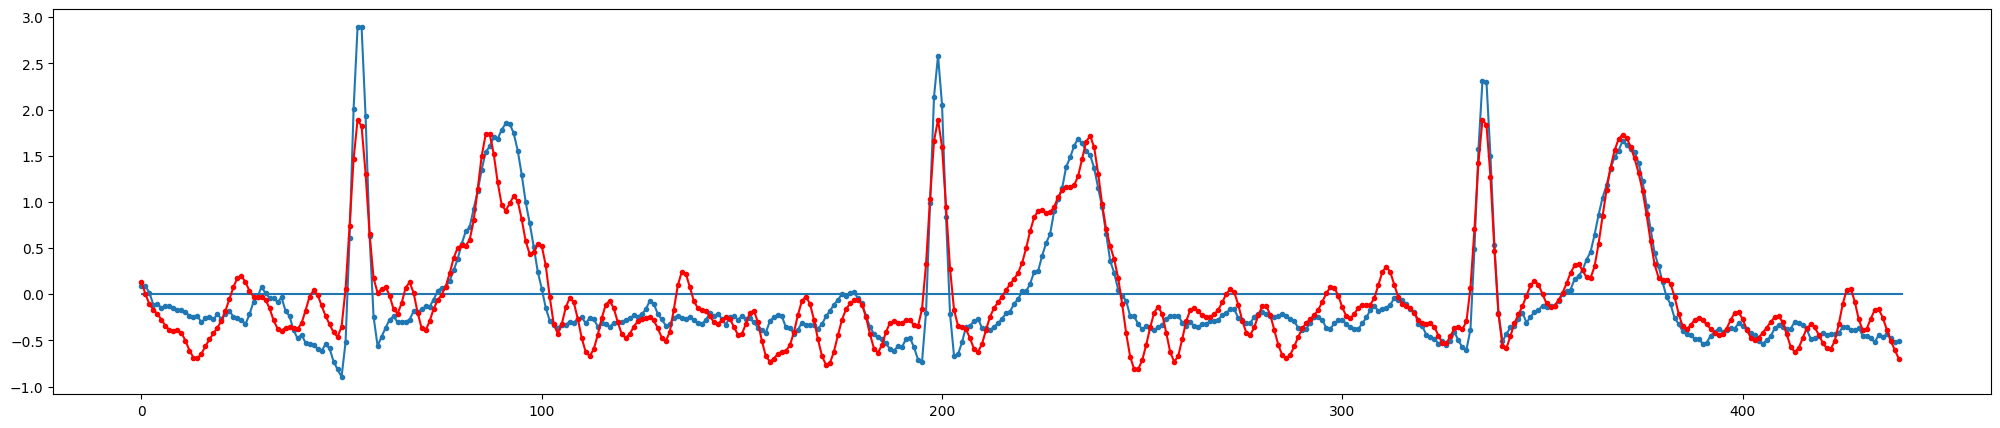

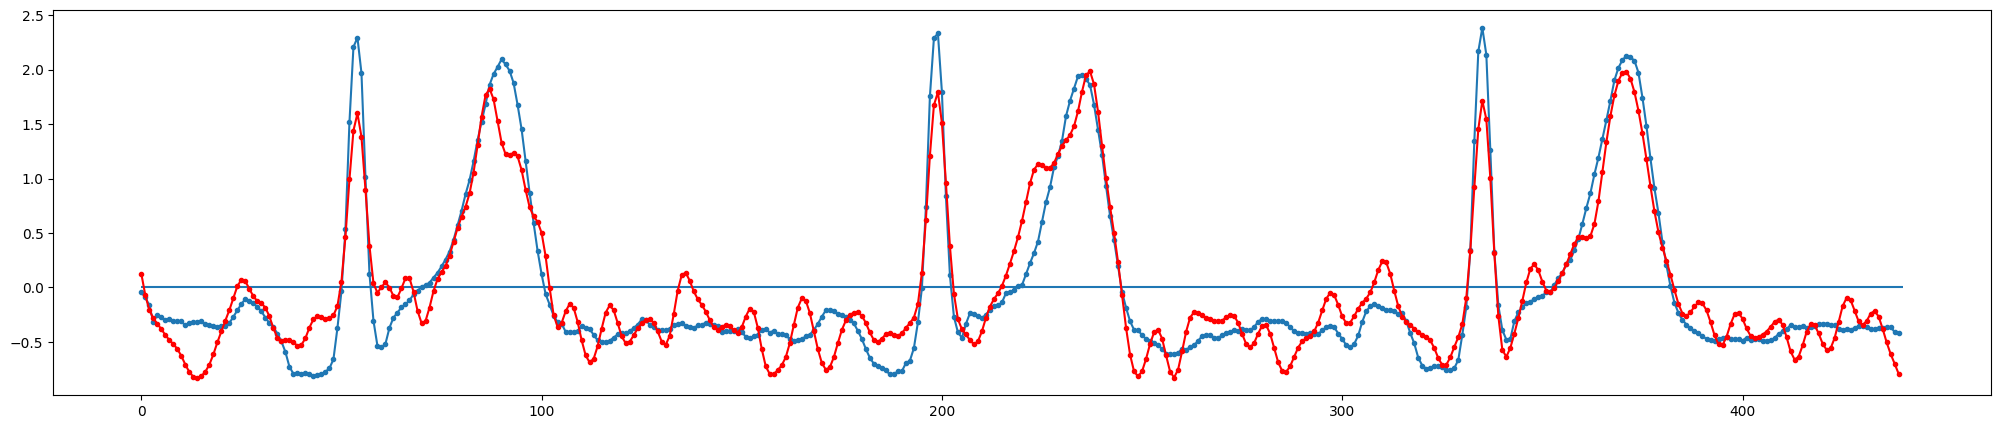

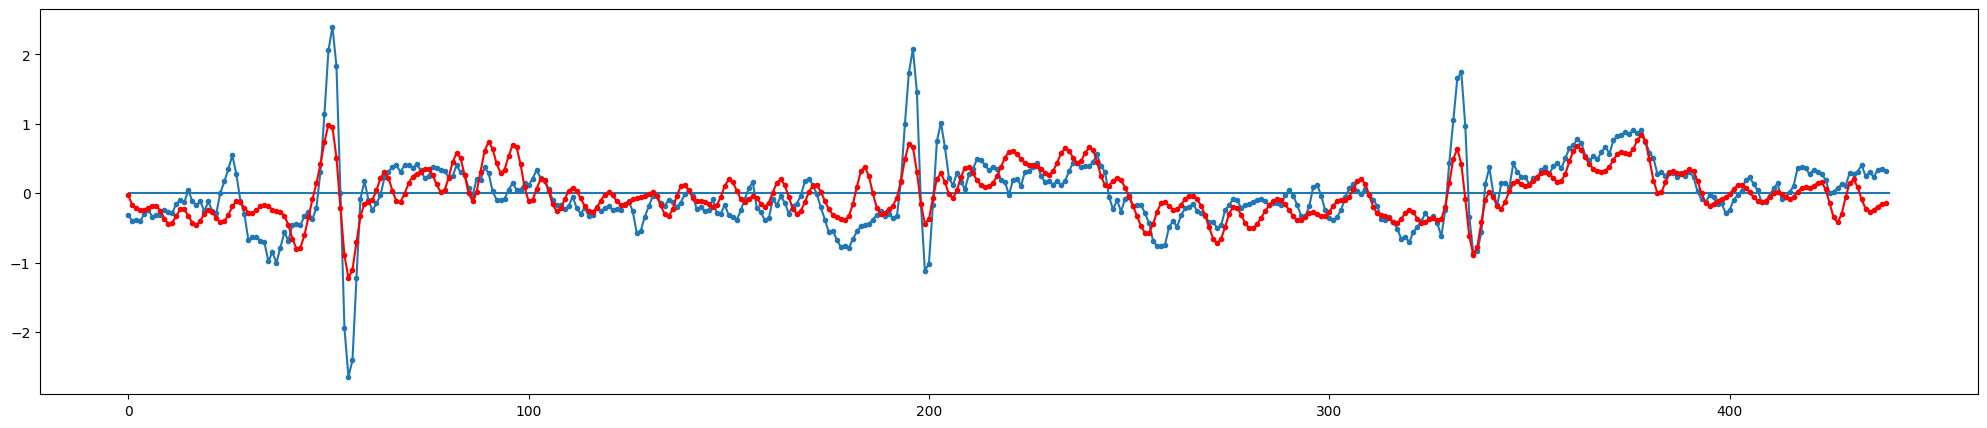

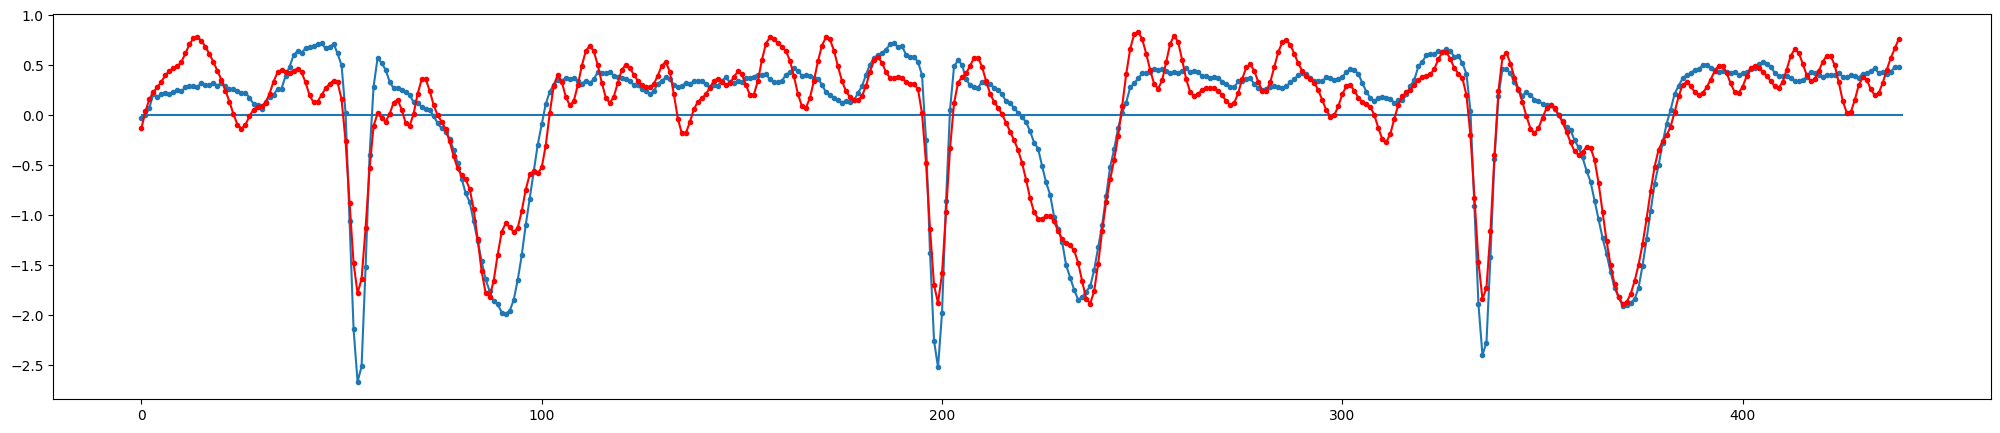

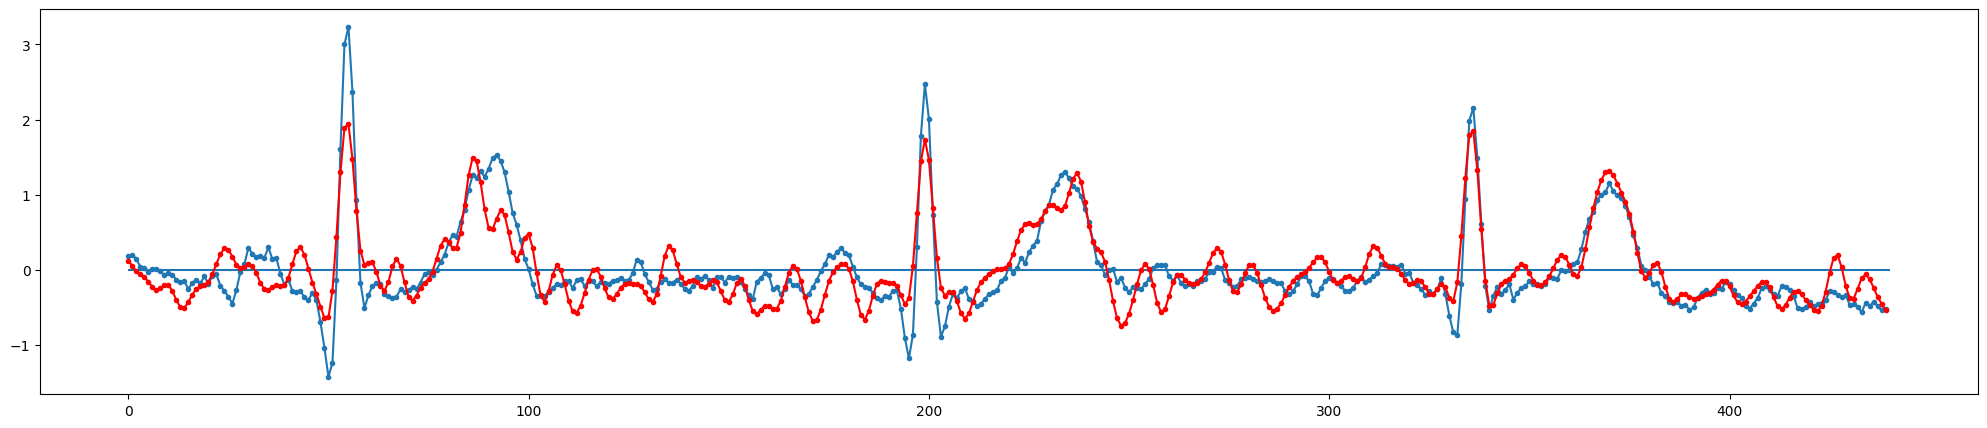

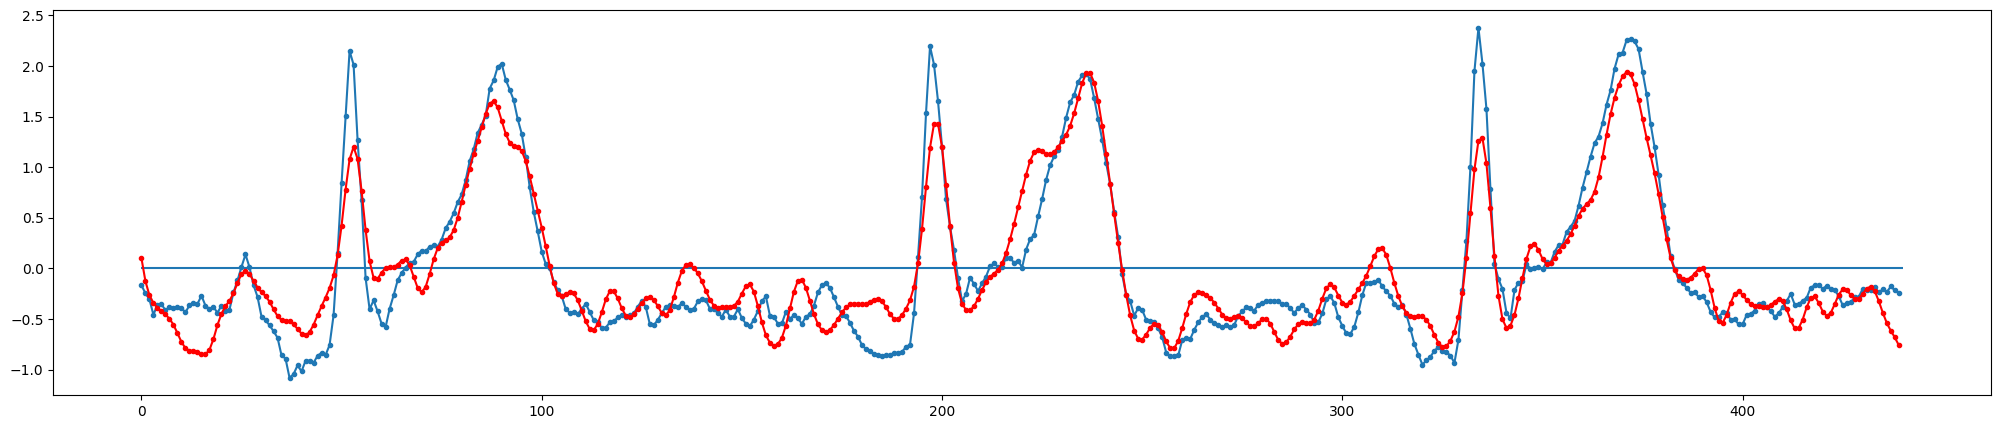

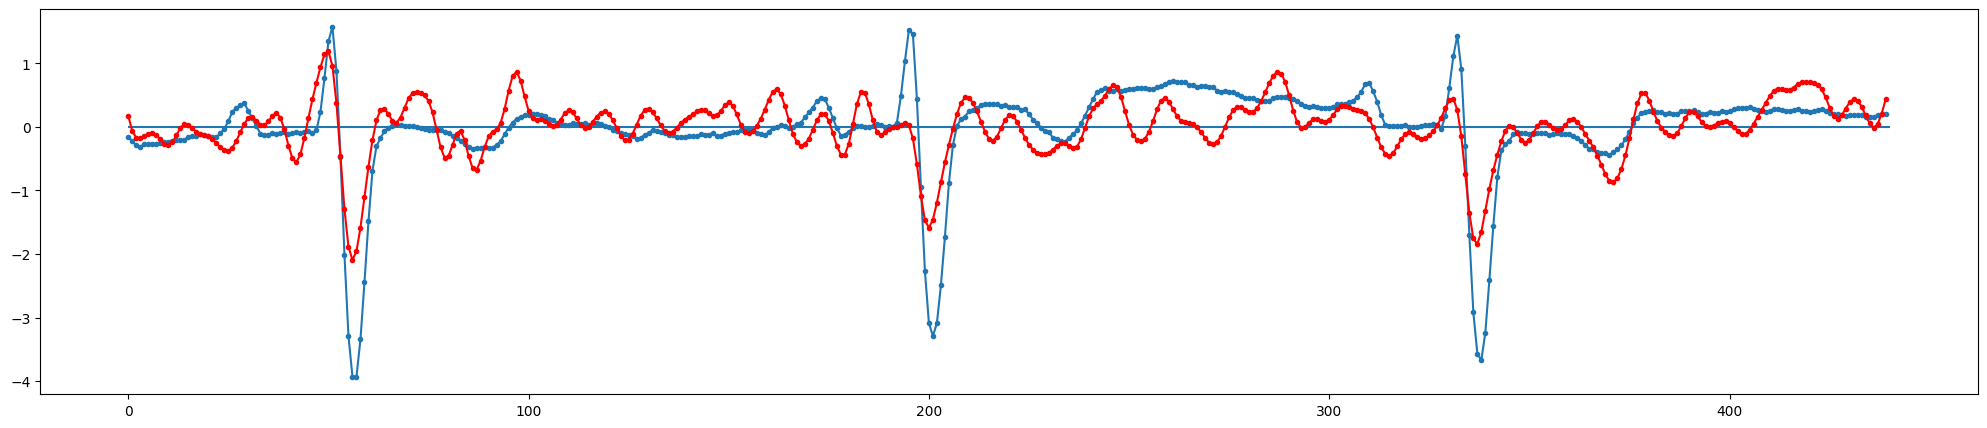

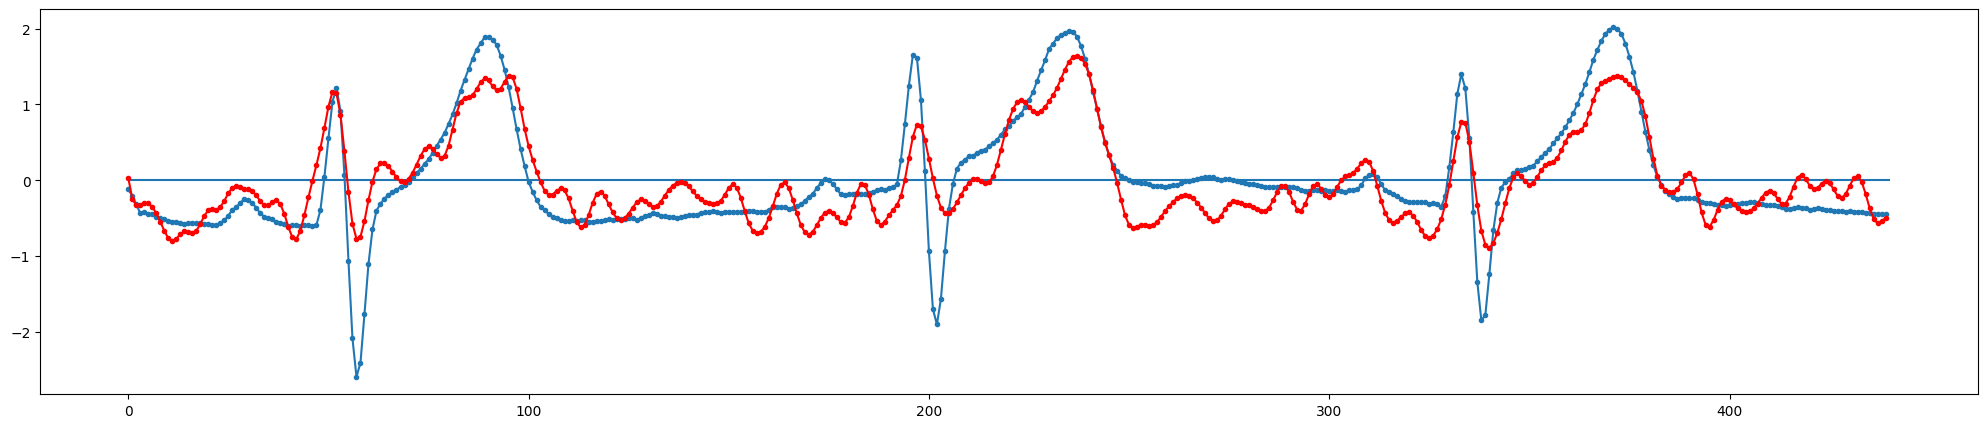

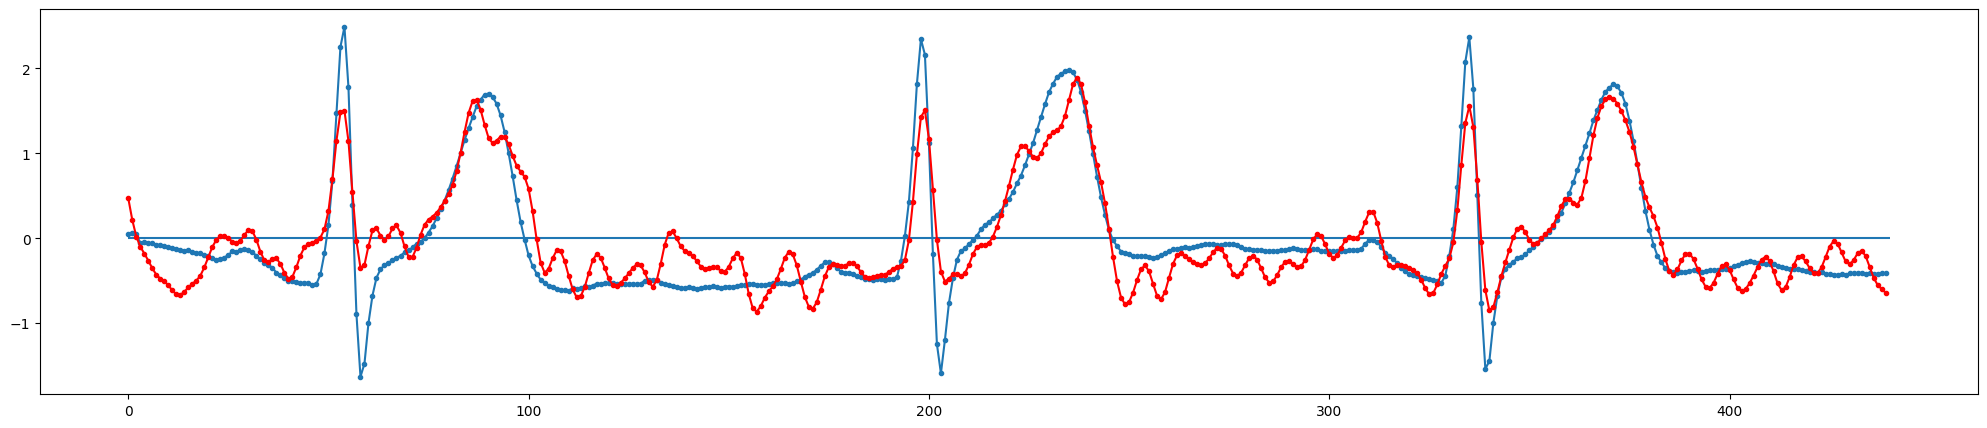

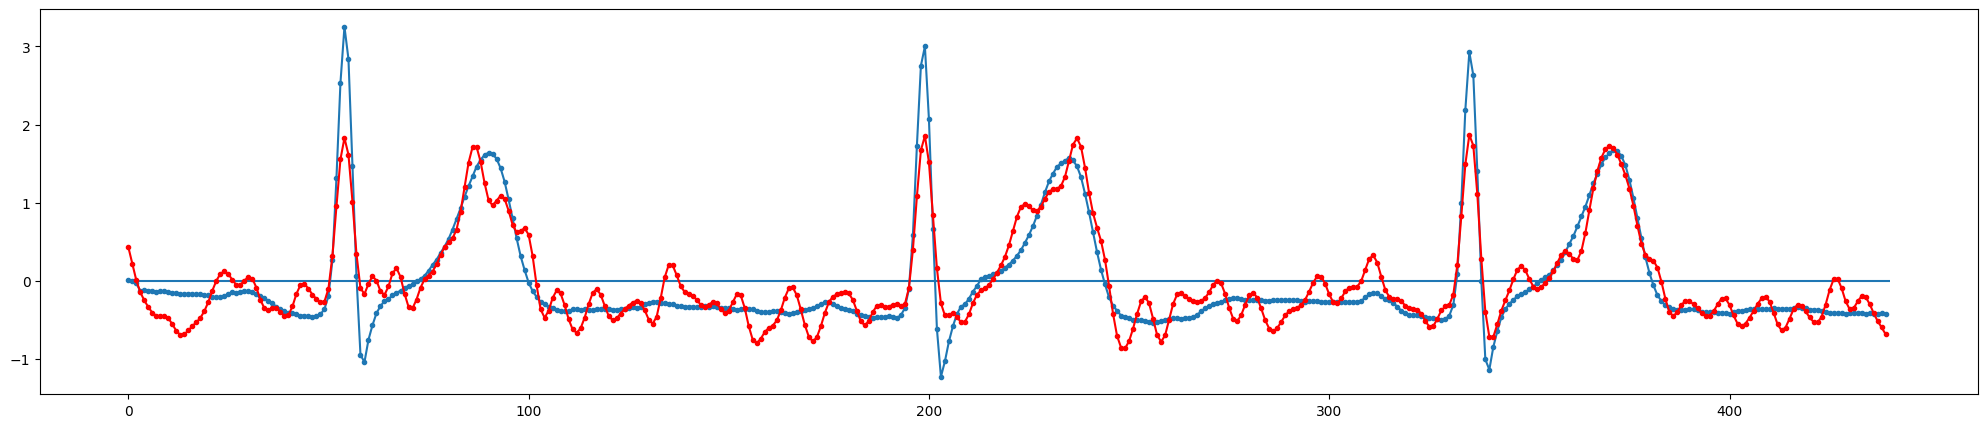

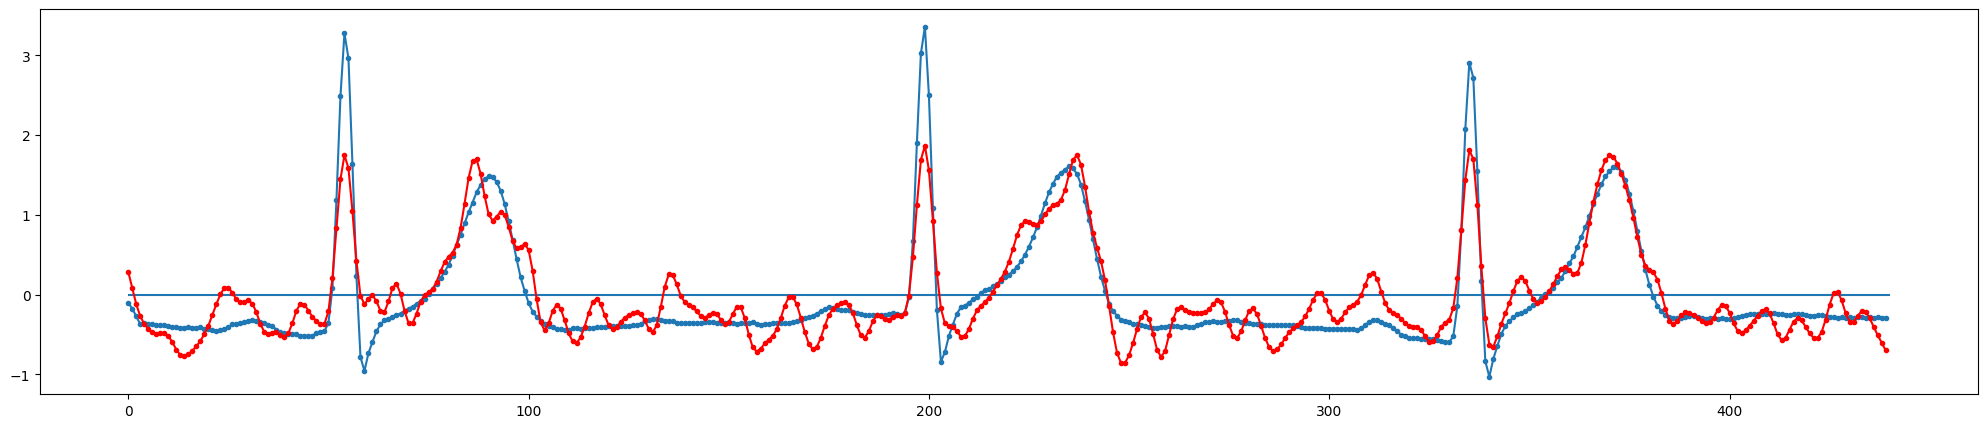

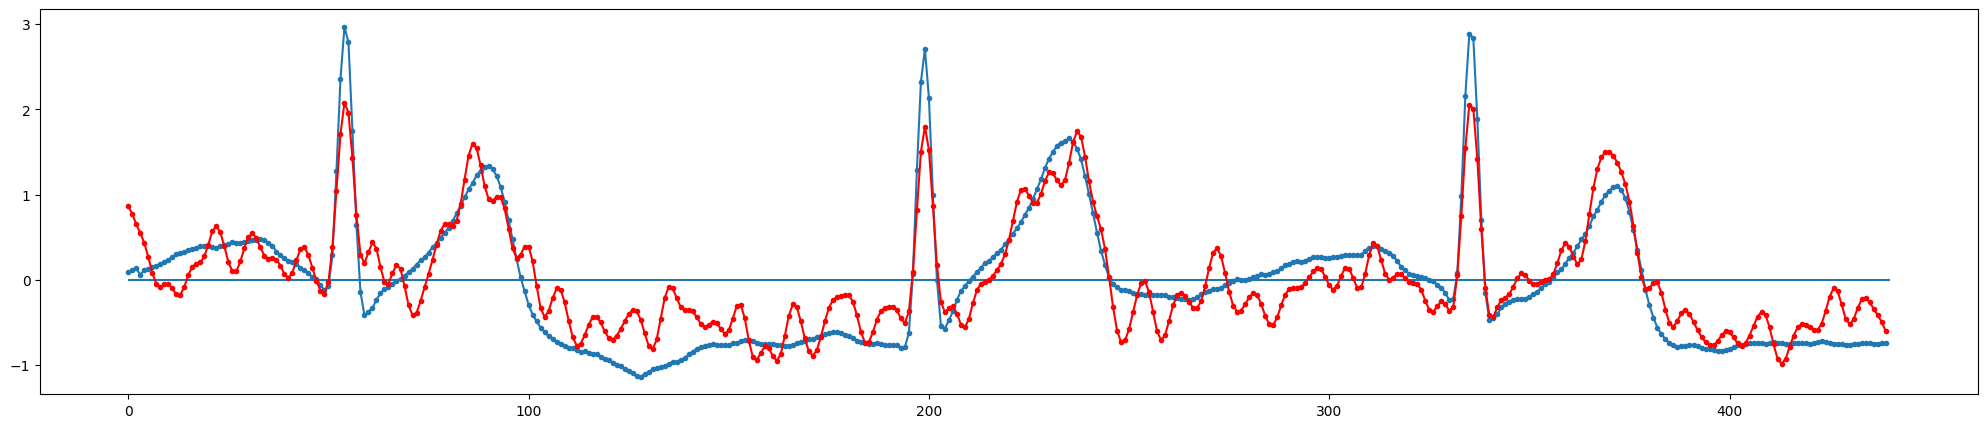

In [9]:
fit_index = int(PERIOD - 0.2 * PERIOD)
for i in range(12):
    plt.figure(figsize=(25, 5))
    plt.hlines(0, 0, fit_index)
    plt.plot(Y[i][:fit_index], '.-')
    # plt.plot(rec1[i][:fit_index], '.-', c="green")
    # plt.plot(rec2[i][:fit_index], '.-')
    plt.plot(rec3[i][:fit_index], '.-', c="red")

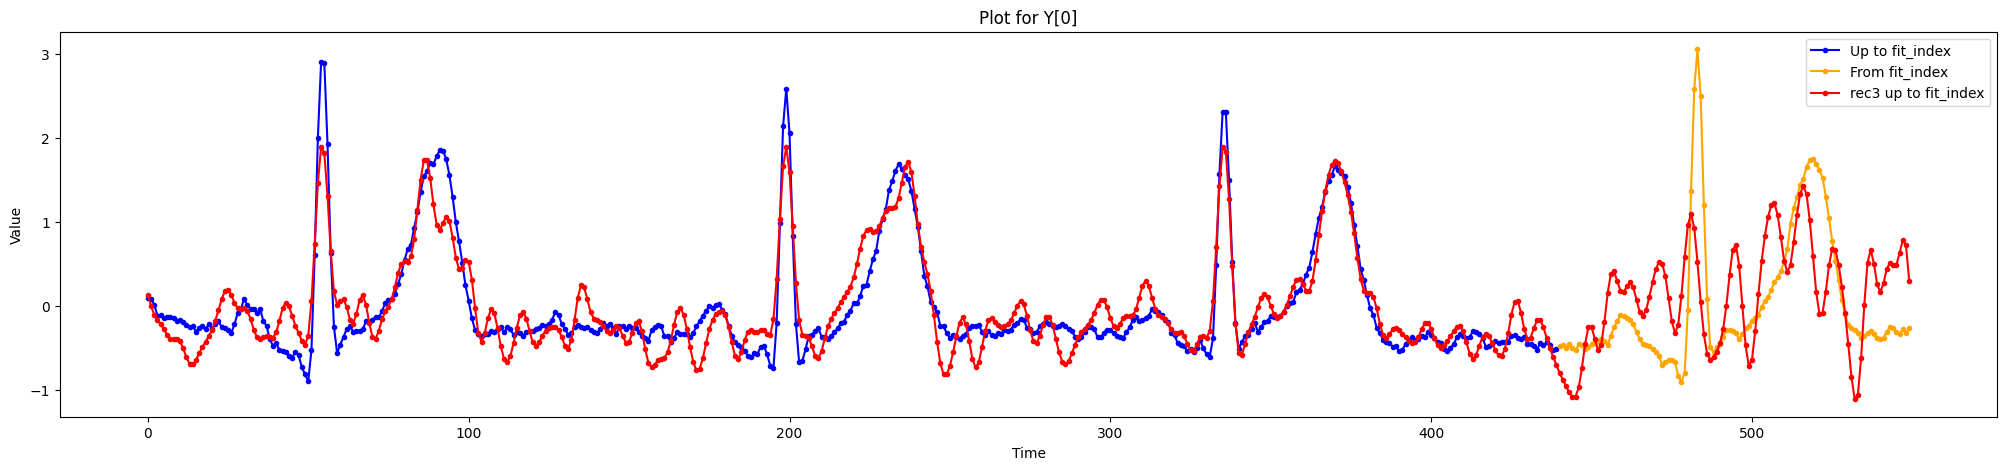

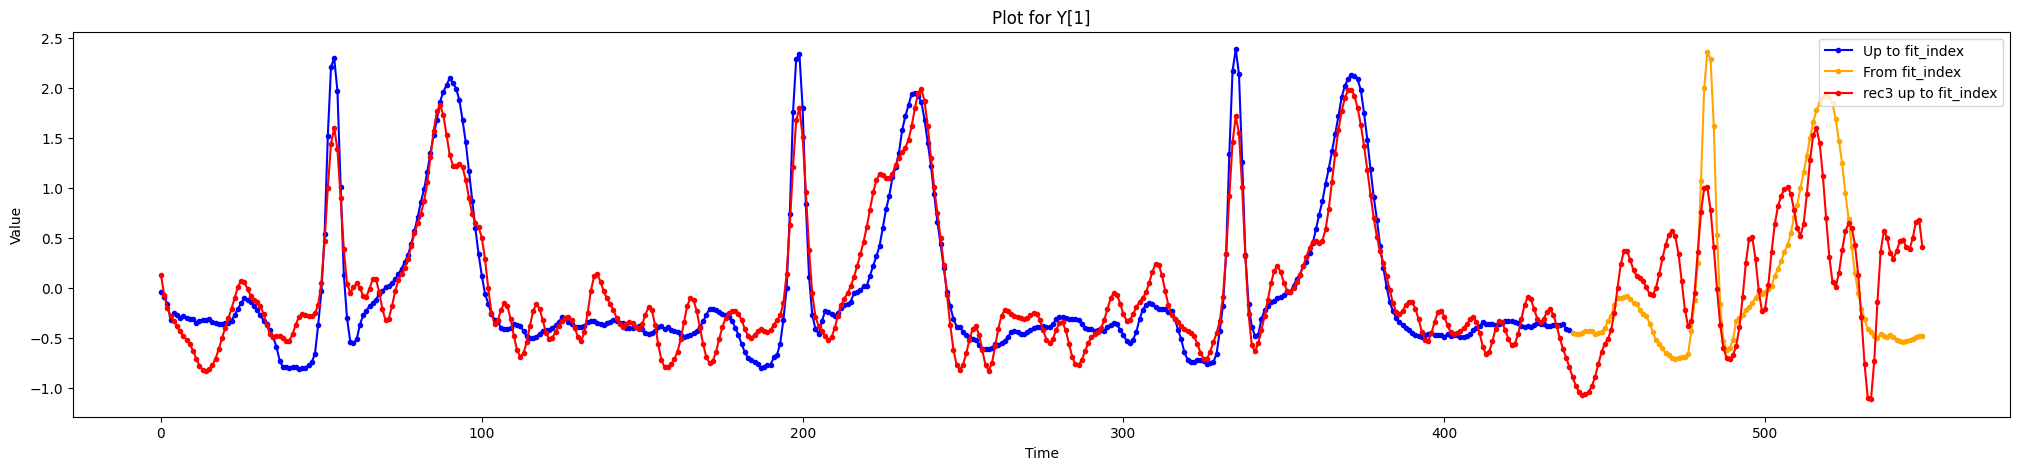

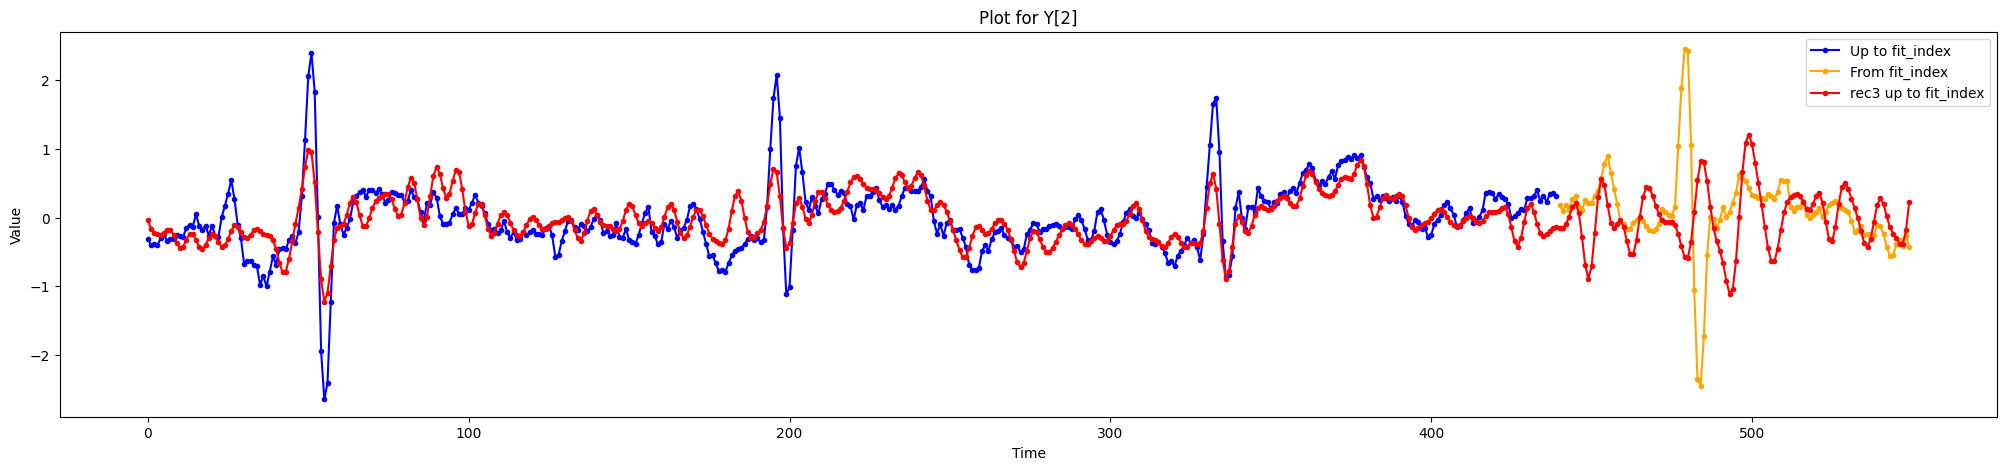

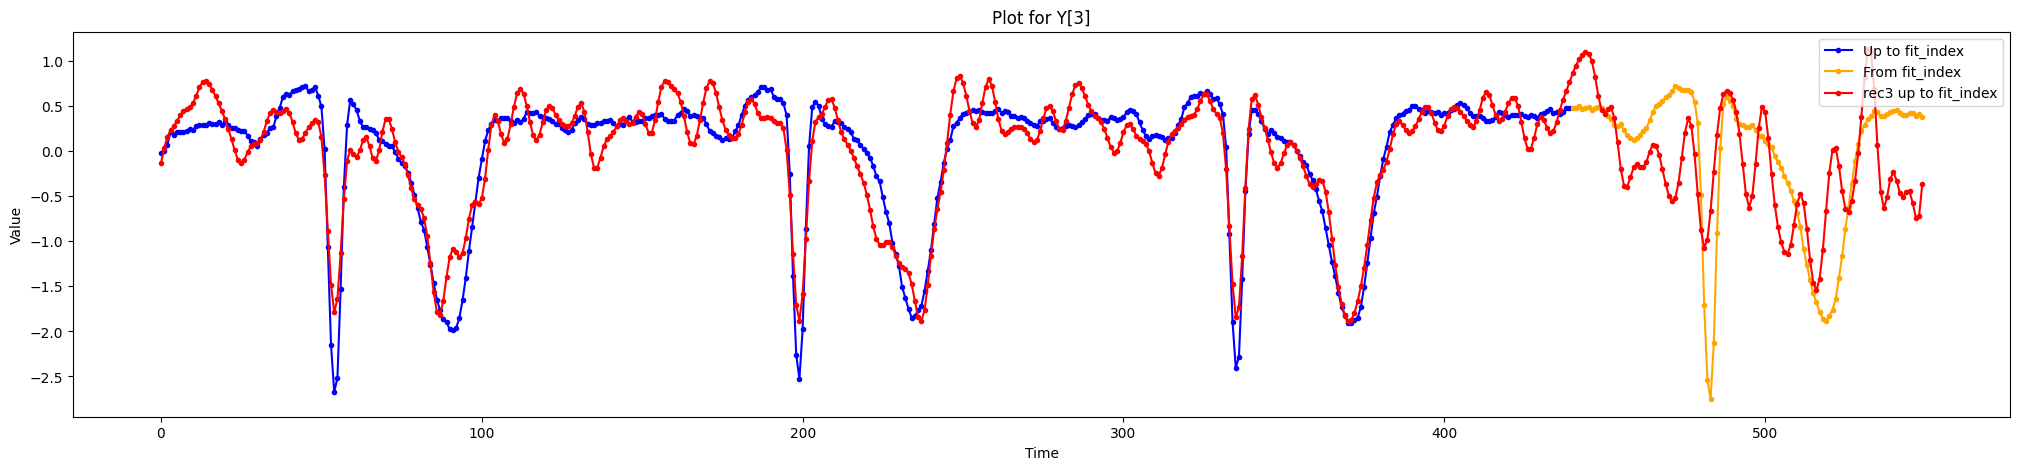

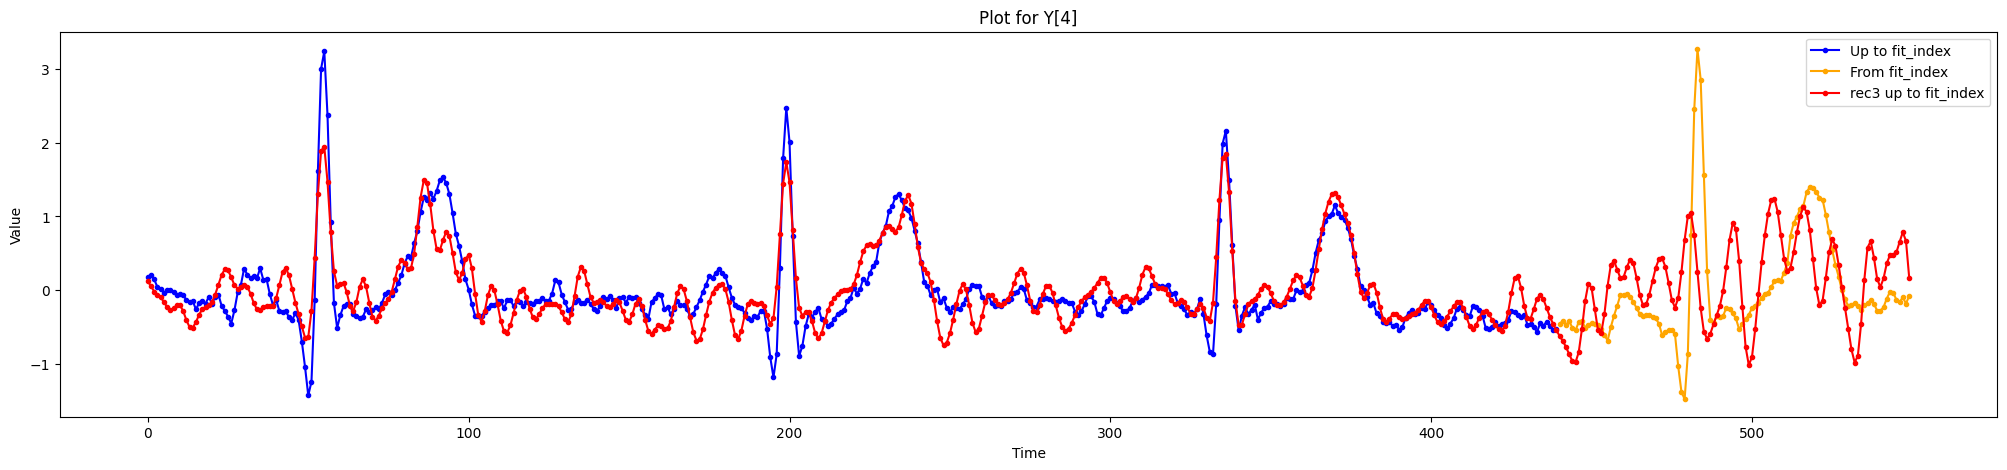

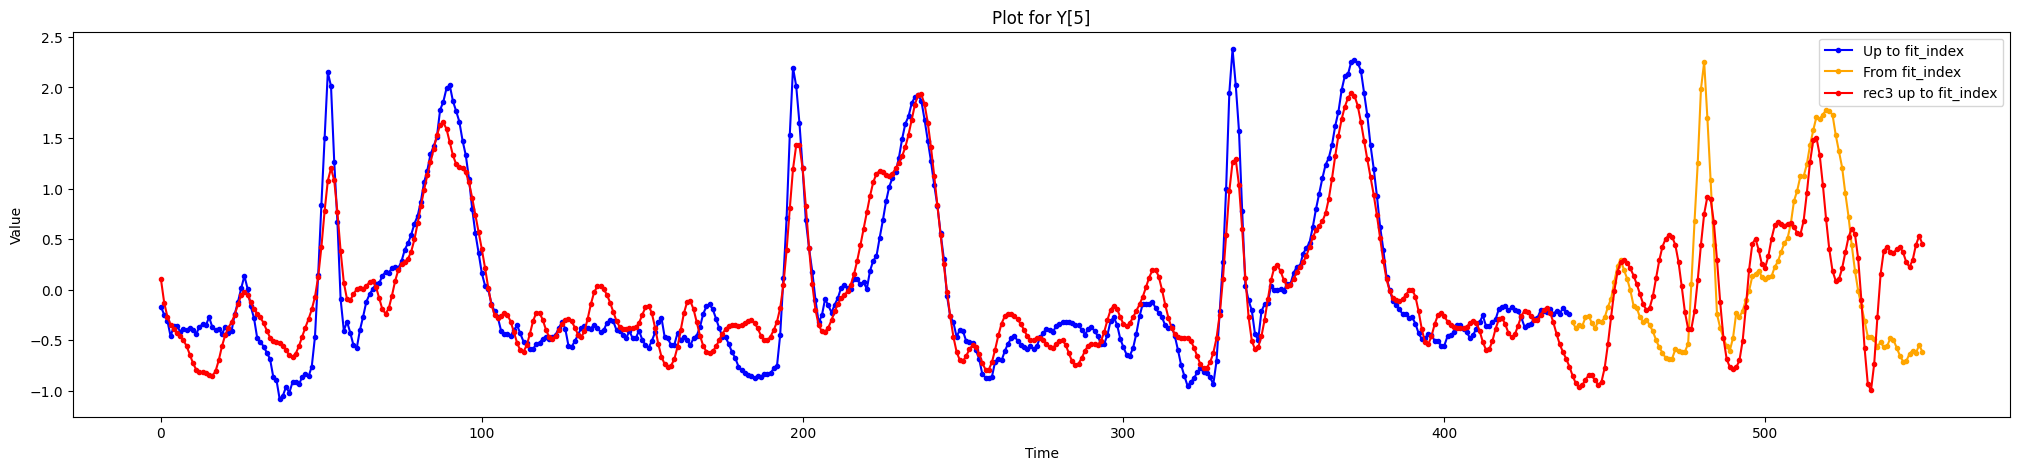

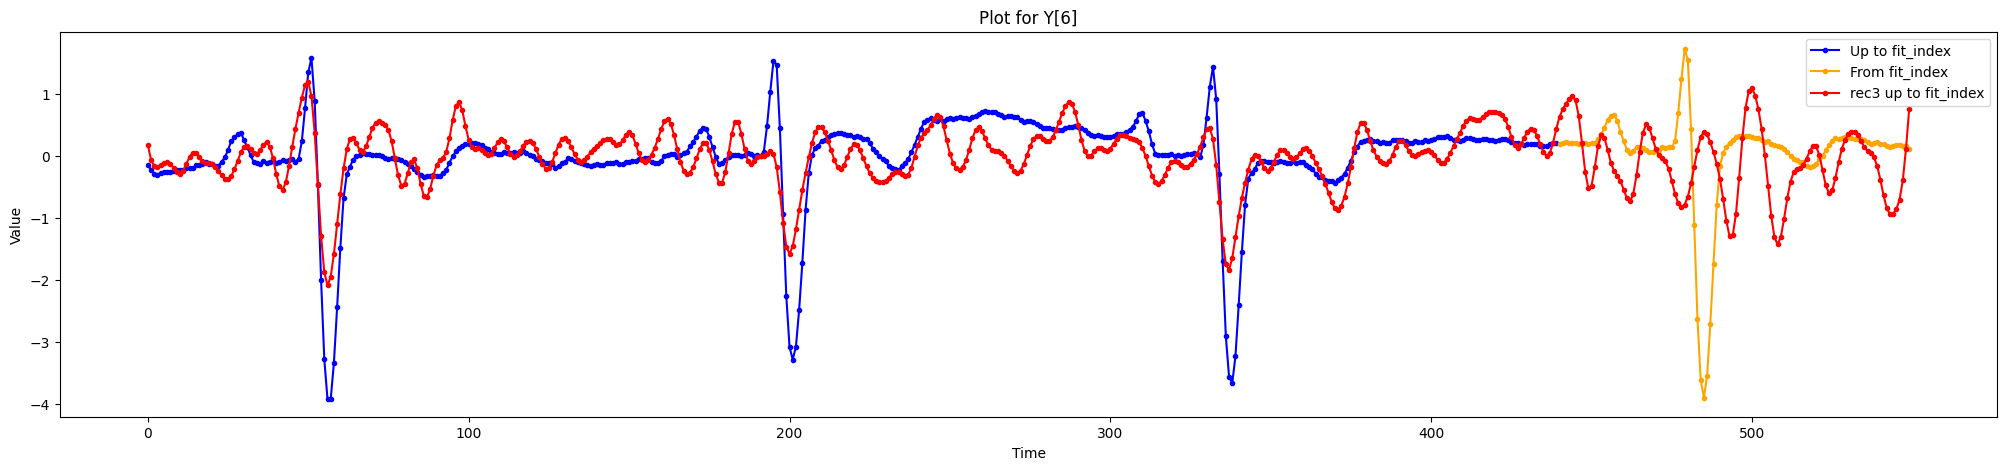

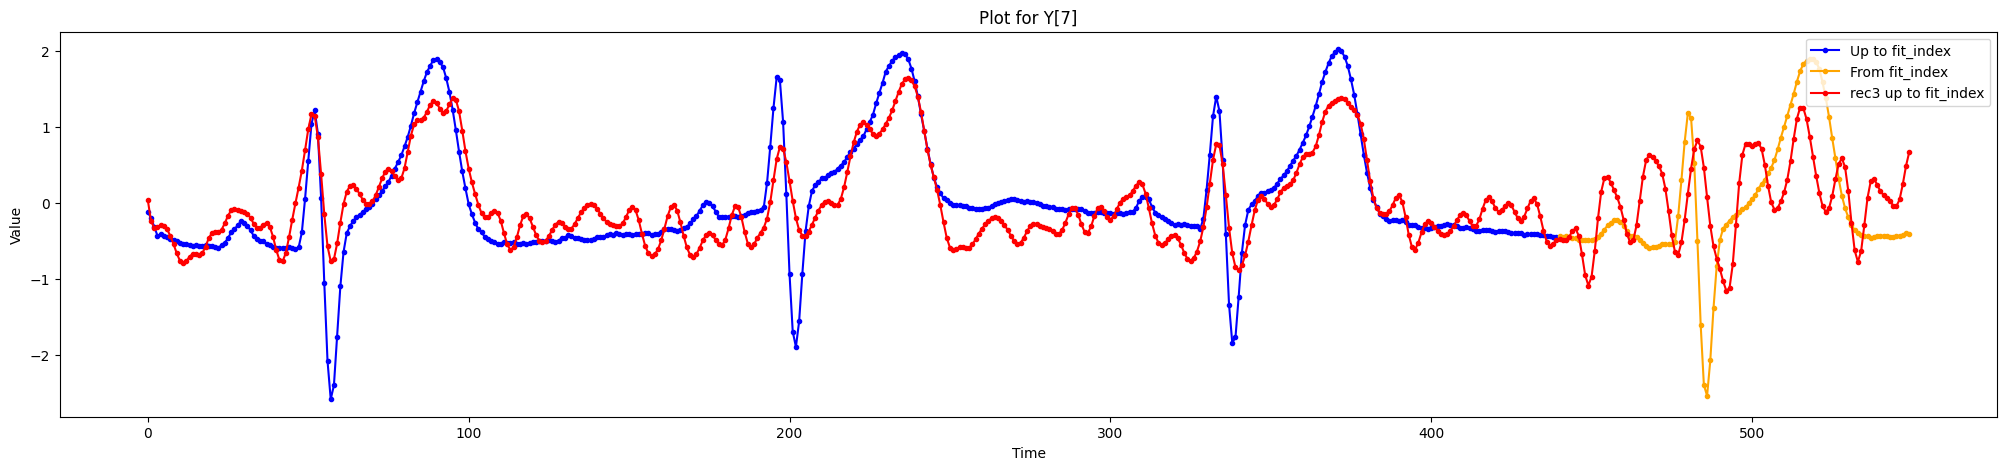

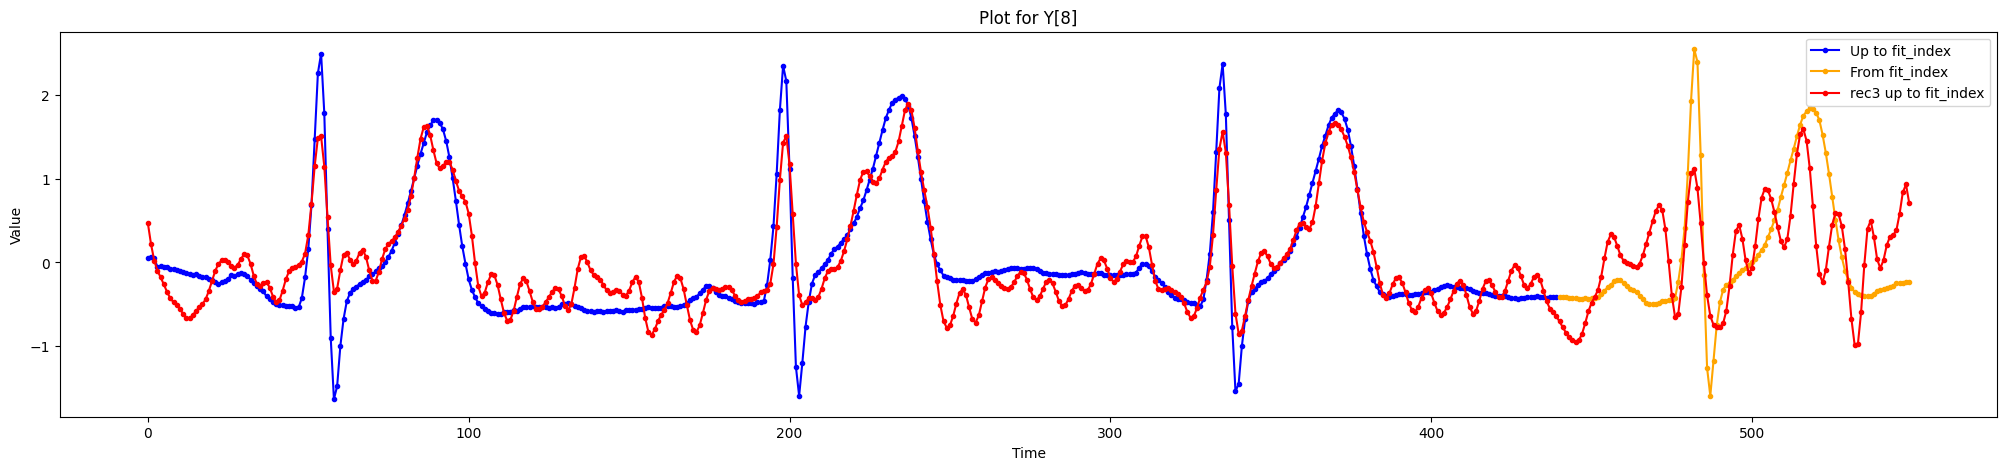

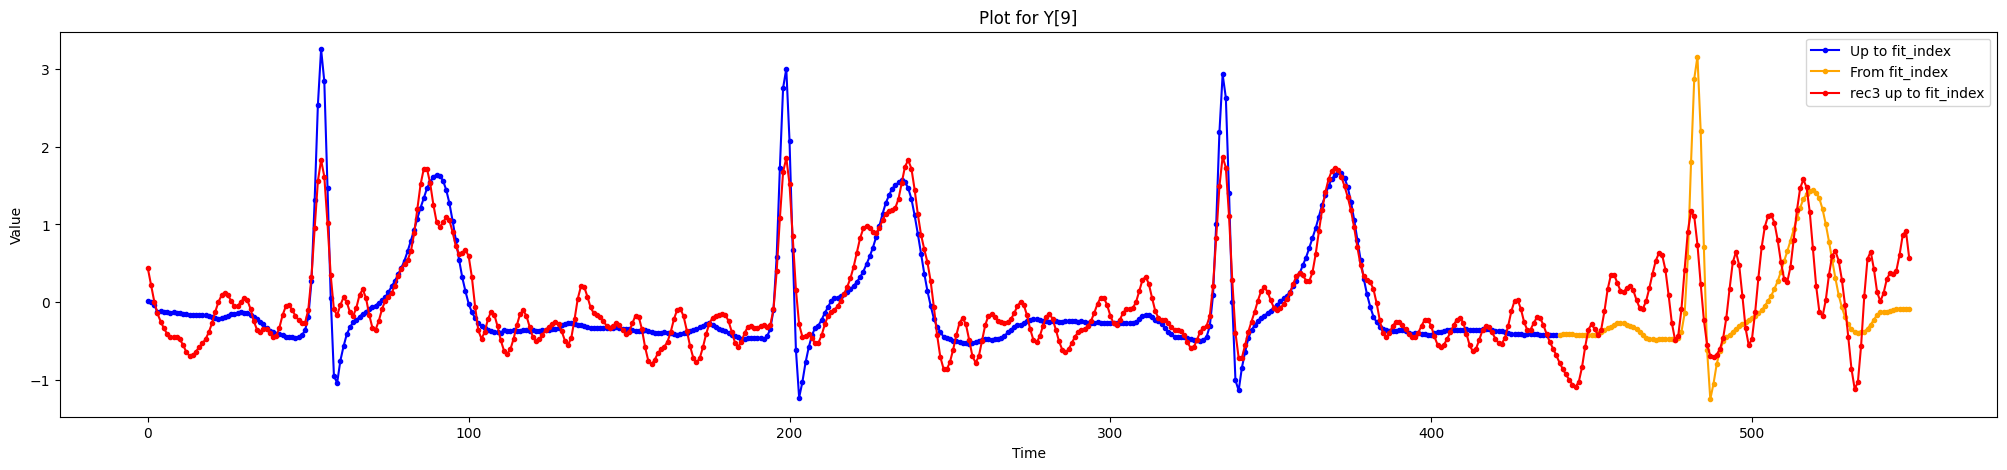

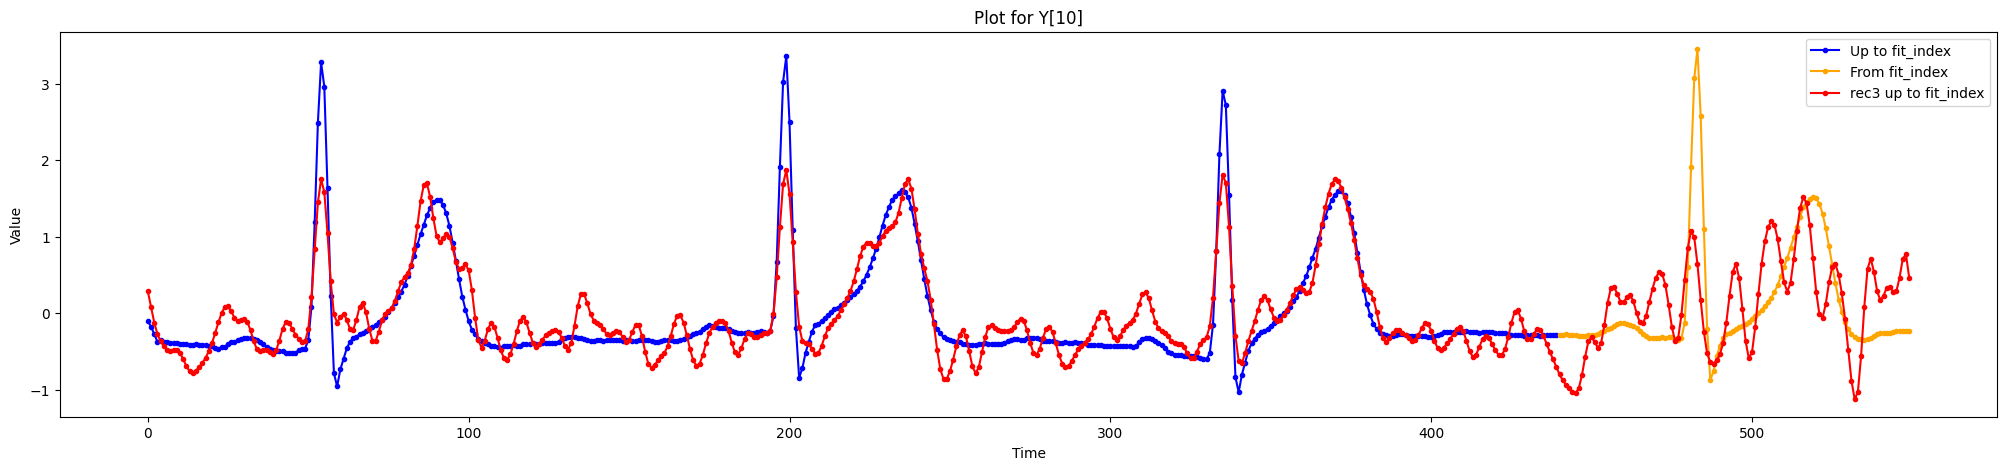

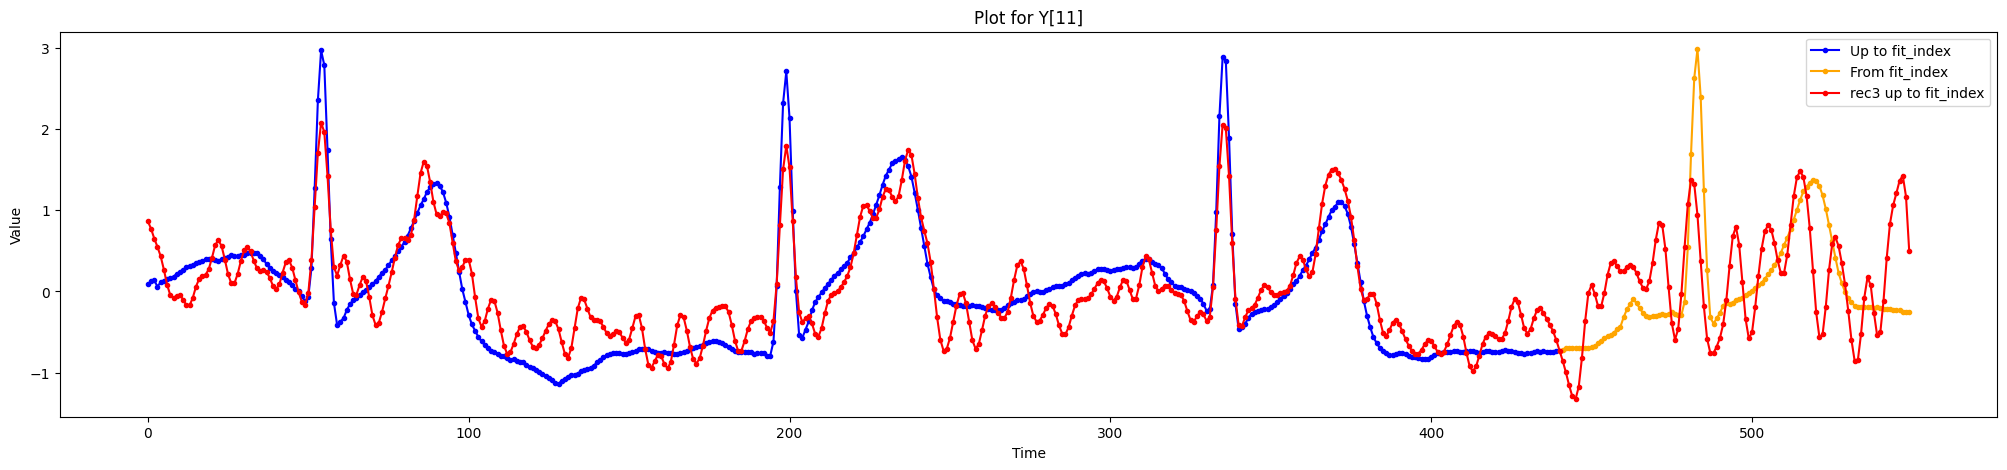

In [10]:
import matplotlib.pyplot as plt

fit_index = int(PERIOD - 0.2 * PERIOD)

# Create separate plots for each series
for i in range(12):
    plt.figure(figsize=(25, 5))
    
    # Plot the portion of Y[i] up to fit_index in blue
    plt.plot(range(fit_index), Y[i][:fit_index], '.-', c='blue', label='Up to fit_index')
    
    # Plot the portion of Y[i] from fit_index onwards in orange
    plt.plot(range(fit_index, 550), Y[i][fit_index:550], '.-', c='orange', label='From fit_index')
    
    # Optionally plot rec3[i][:fit_index] in red
    plt.plot(rec3[i], '.-', c="red", label='rec3 up to fit_index')
    
    # Add a horizontal line at y=0 for reference
    # plt.hlines(0, 0, len(Y[i]), colors='gray', linestyles='dashed')

    # Add titles, labels, and legend
    plt.title(f"Plot for Y[{i}]")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()


In [11]:
# time = np.arange(fit_index)
# for i in range(12):    
#     difference = np.abs(Y[i][:fit_index] - rec1[i][:fit_index])
#     threshold = np.percentile(difference, 99)
#     # threshold=1.25
    
#     isolated_peaks = np.where(difference > threshold, Y[i][:fit_index], 0)
#     non_zero_indices = isolated_peaks != 0
#     non_zero_times = time[non_zero_indices]
#     non_zero_peaks = isolated_peaks[non_zero_indices]
    
#     plt.figure(figsize=(25, 8))
#     plt.plot(time, Y[i][:fit_index], '-', label='Original Signal')
#     plt.plot(time, rec1[i][:fit_index], '.-', label='Modeled Signal')
#     plt.scatter(non_zero_times, non_zero_peaks, label='Isolated Peaks', marker='x', c="r")
#     plt.hlines(0, 0, fit_index)

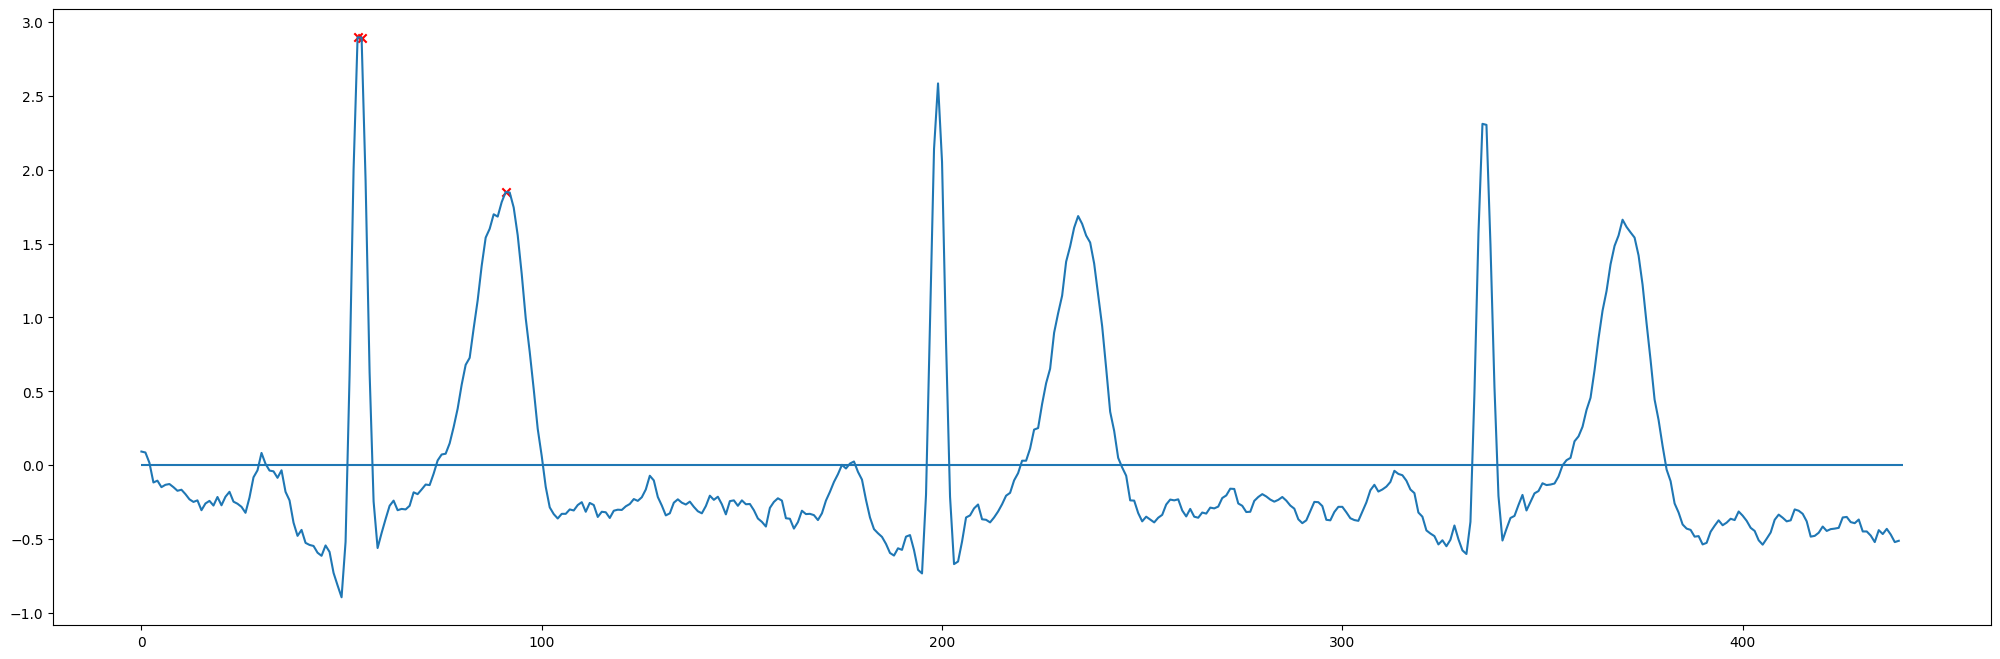

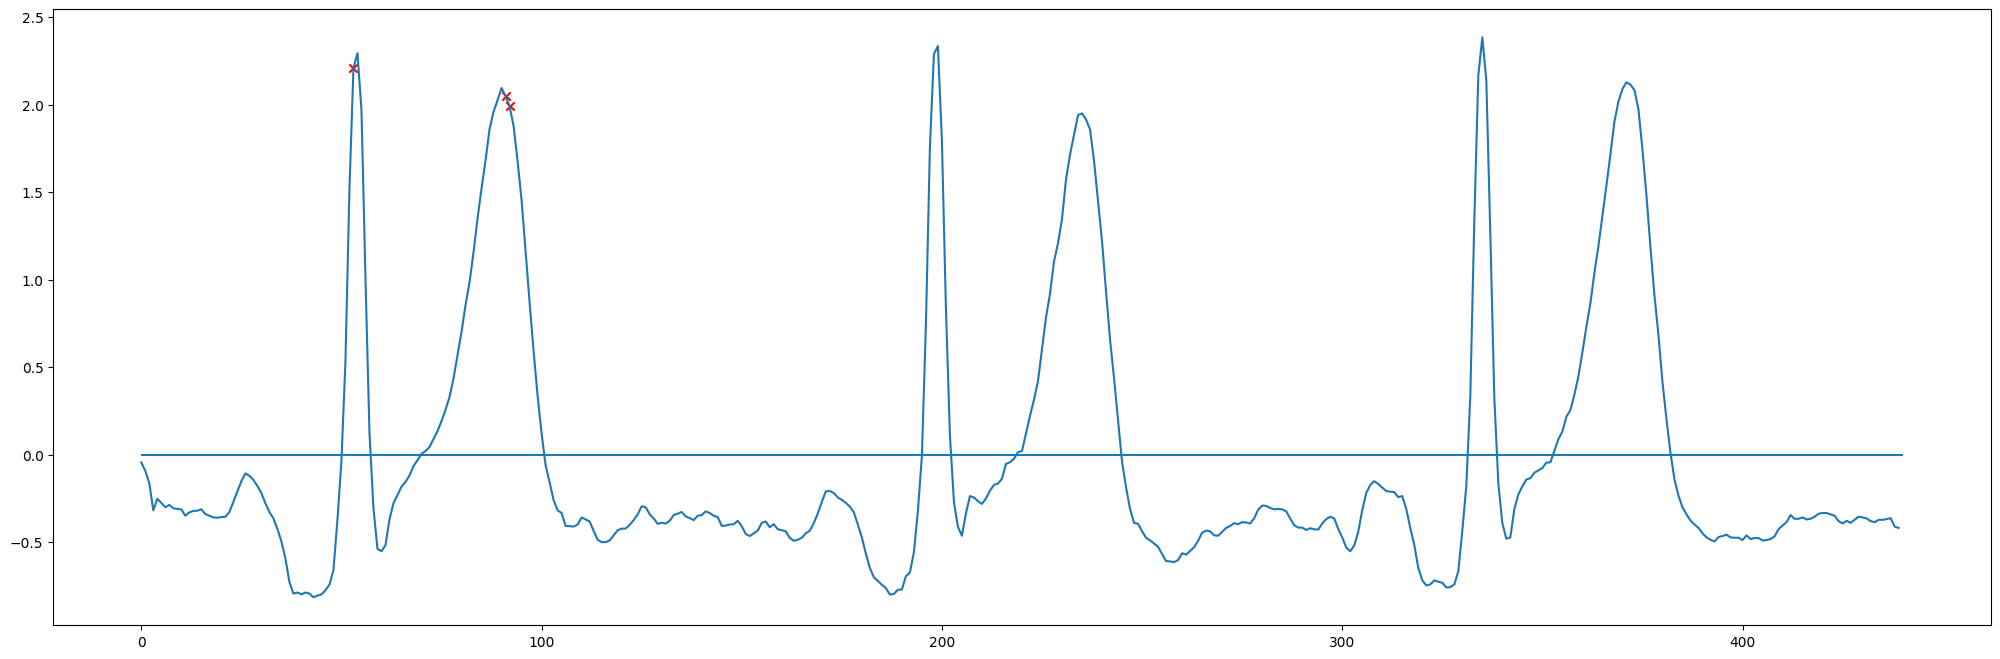

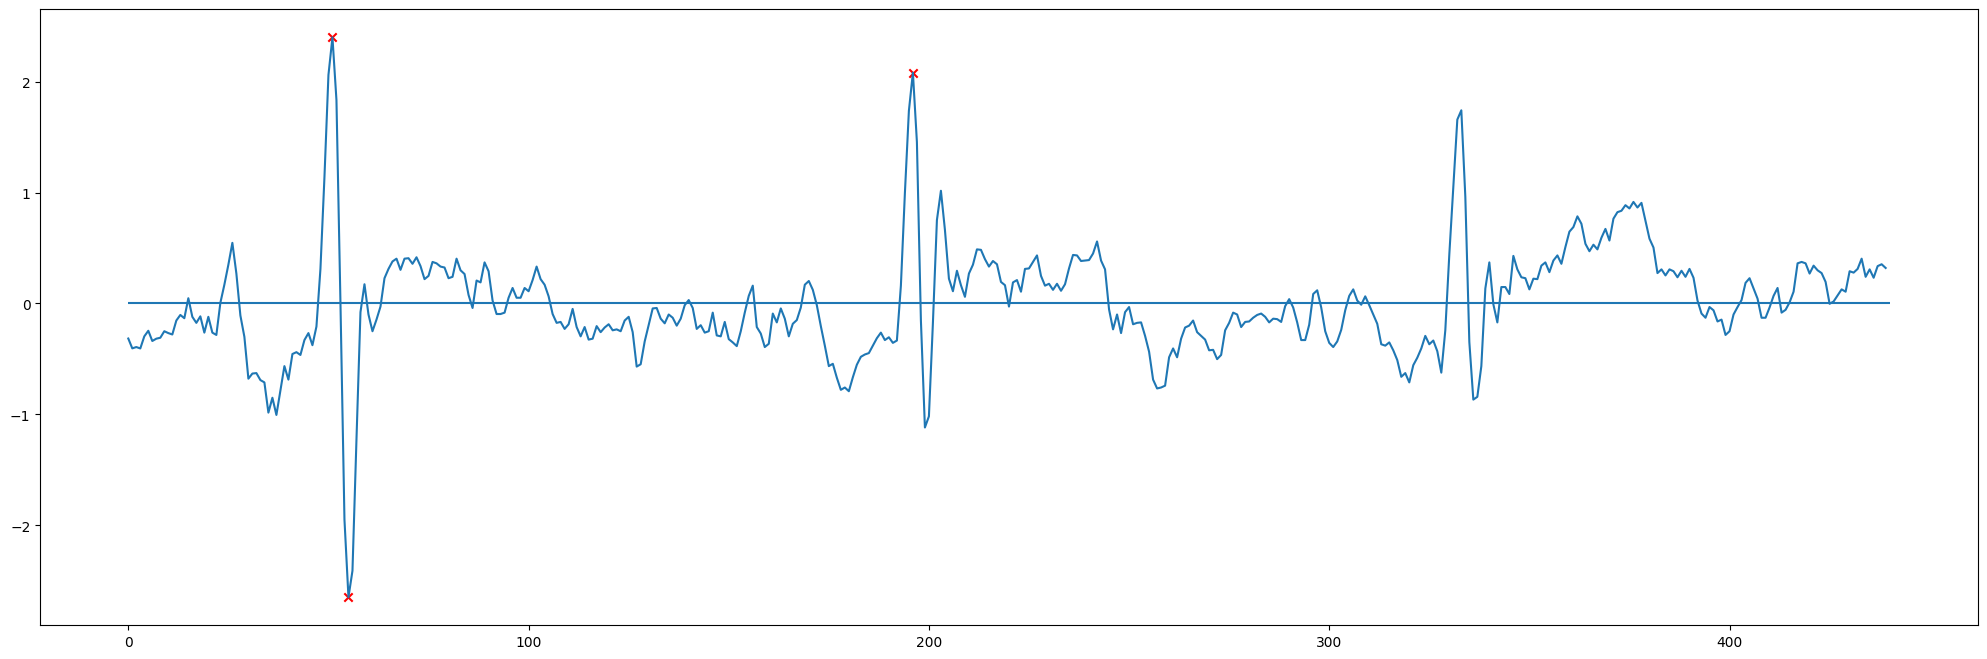

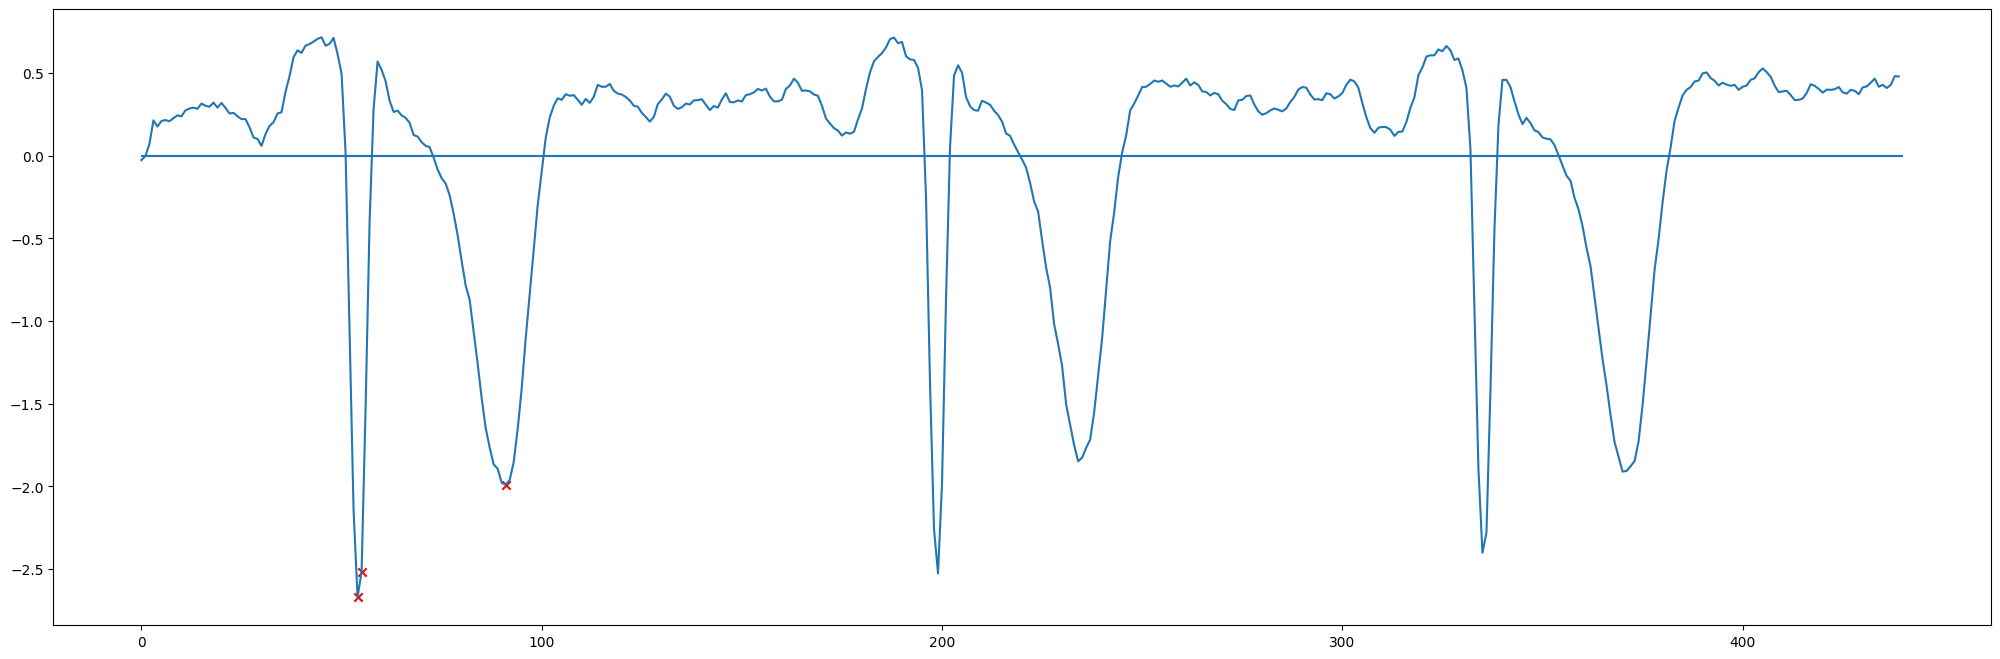

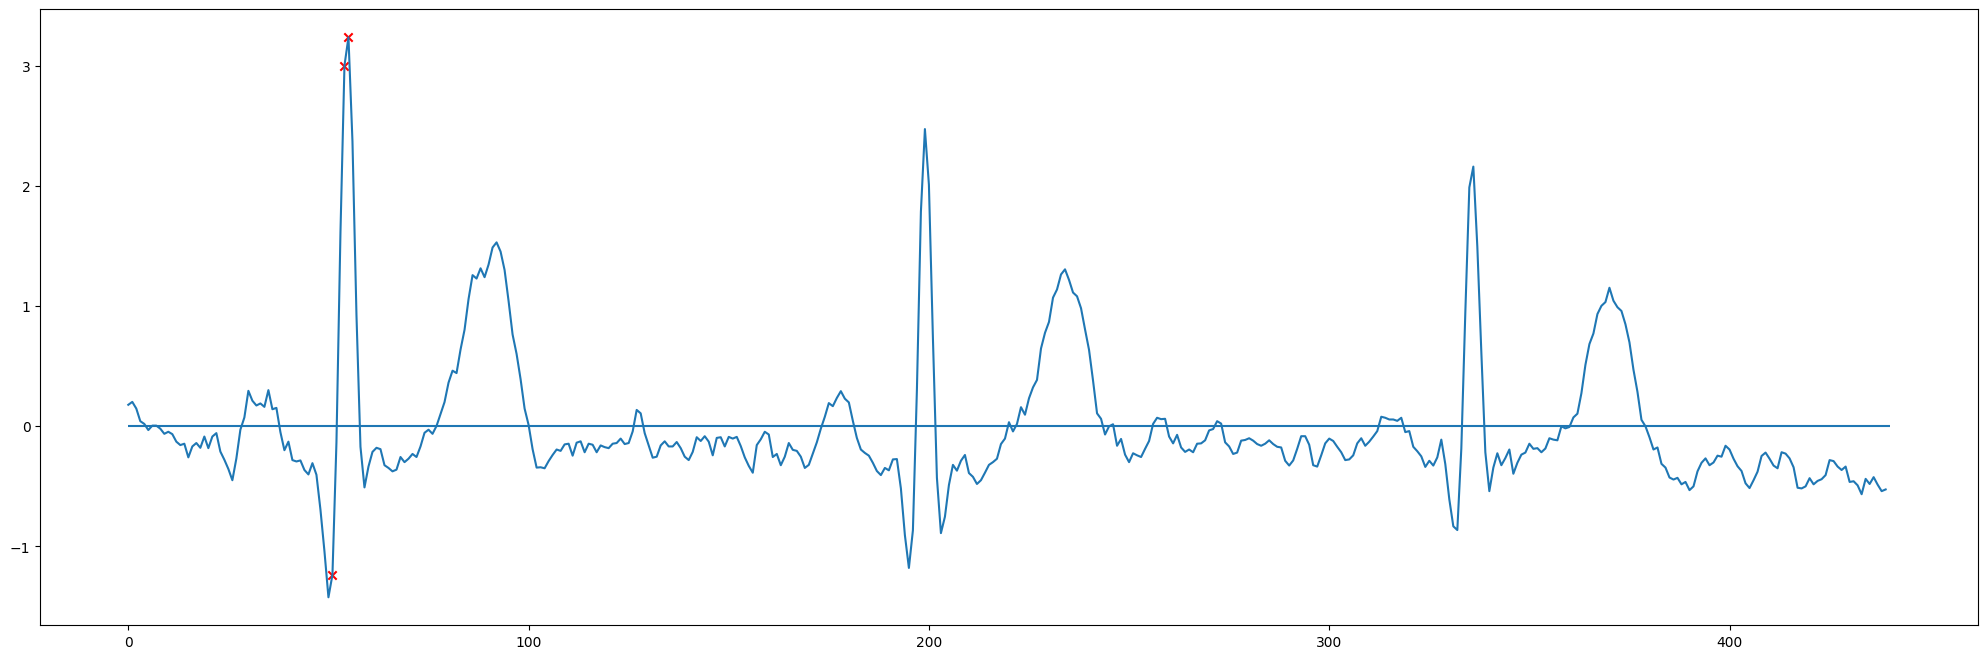

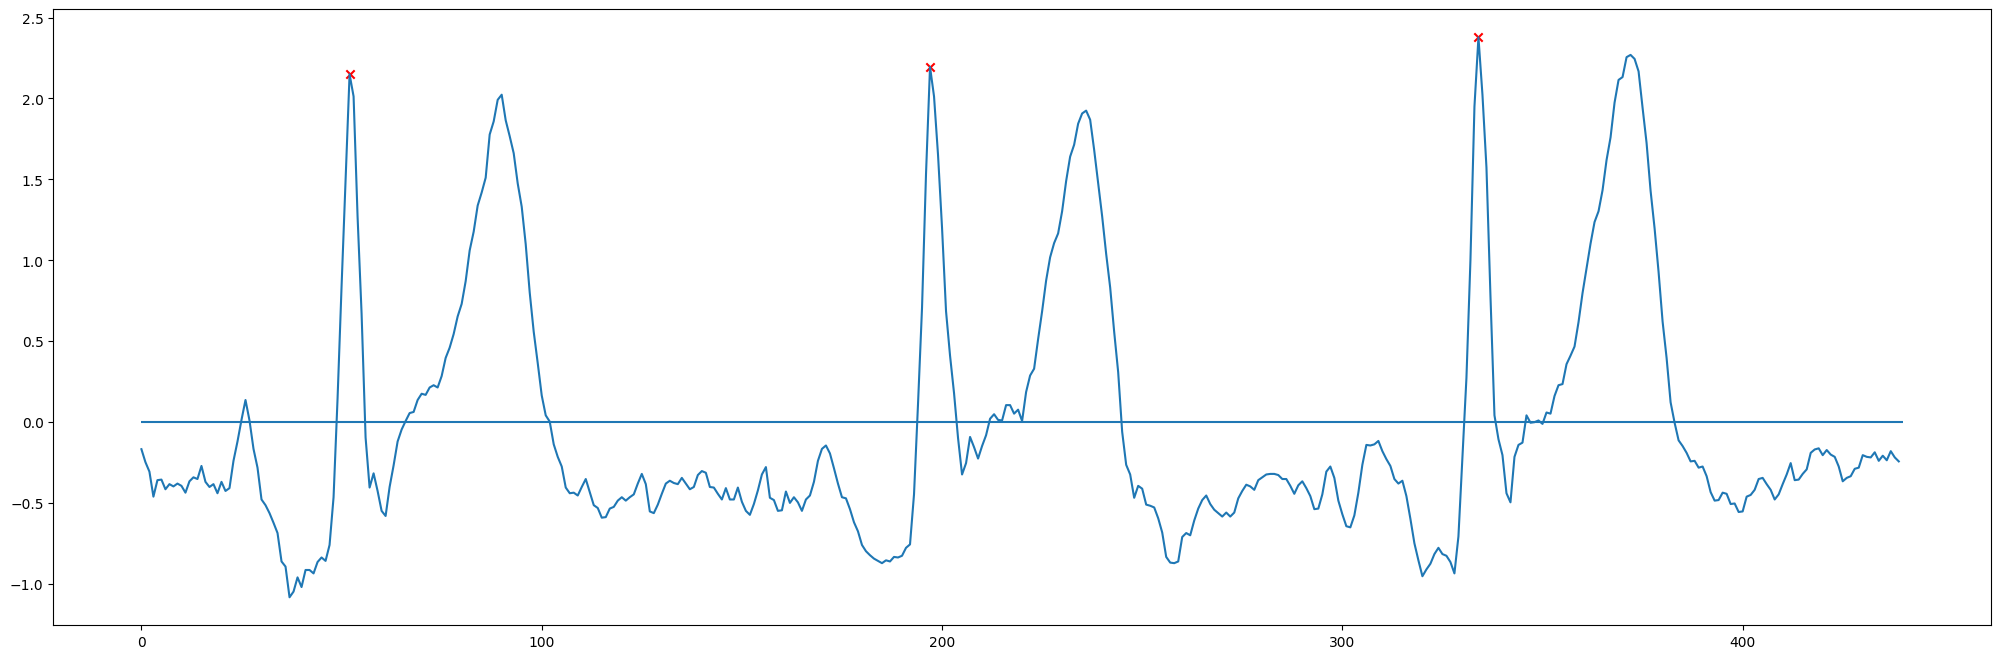

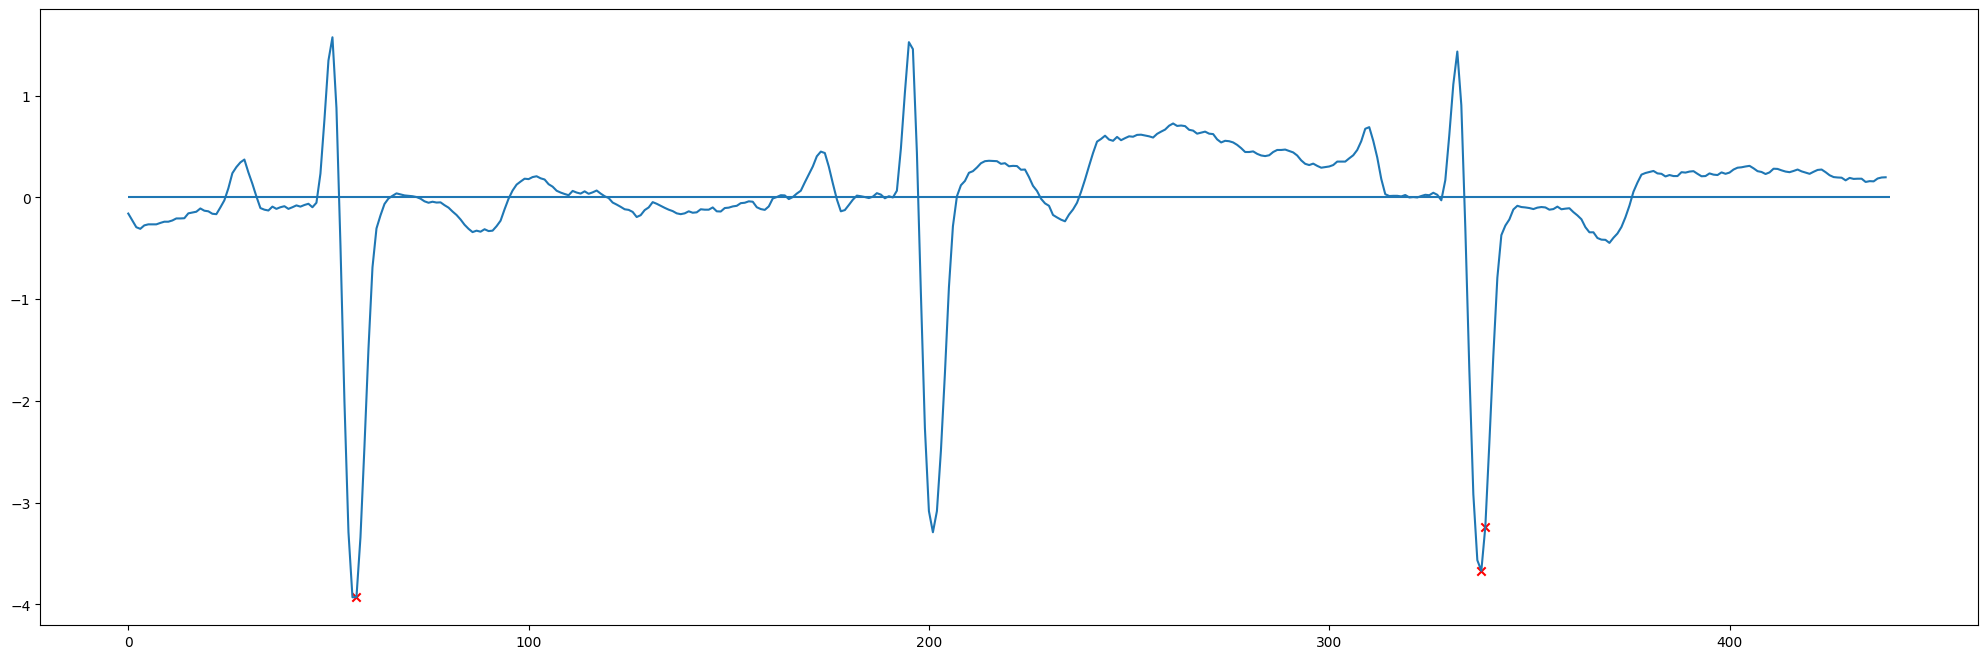

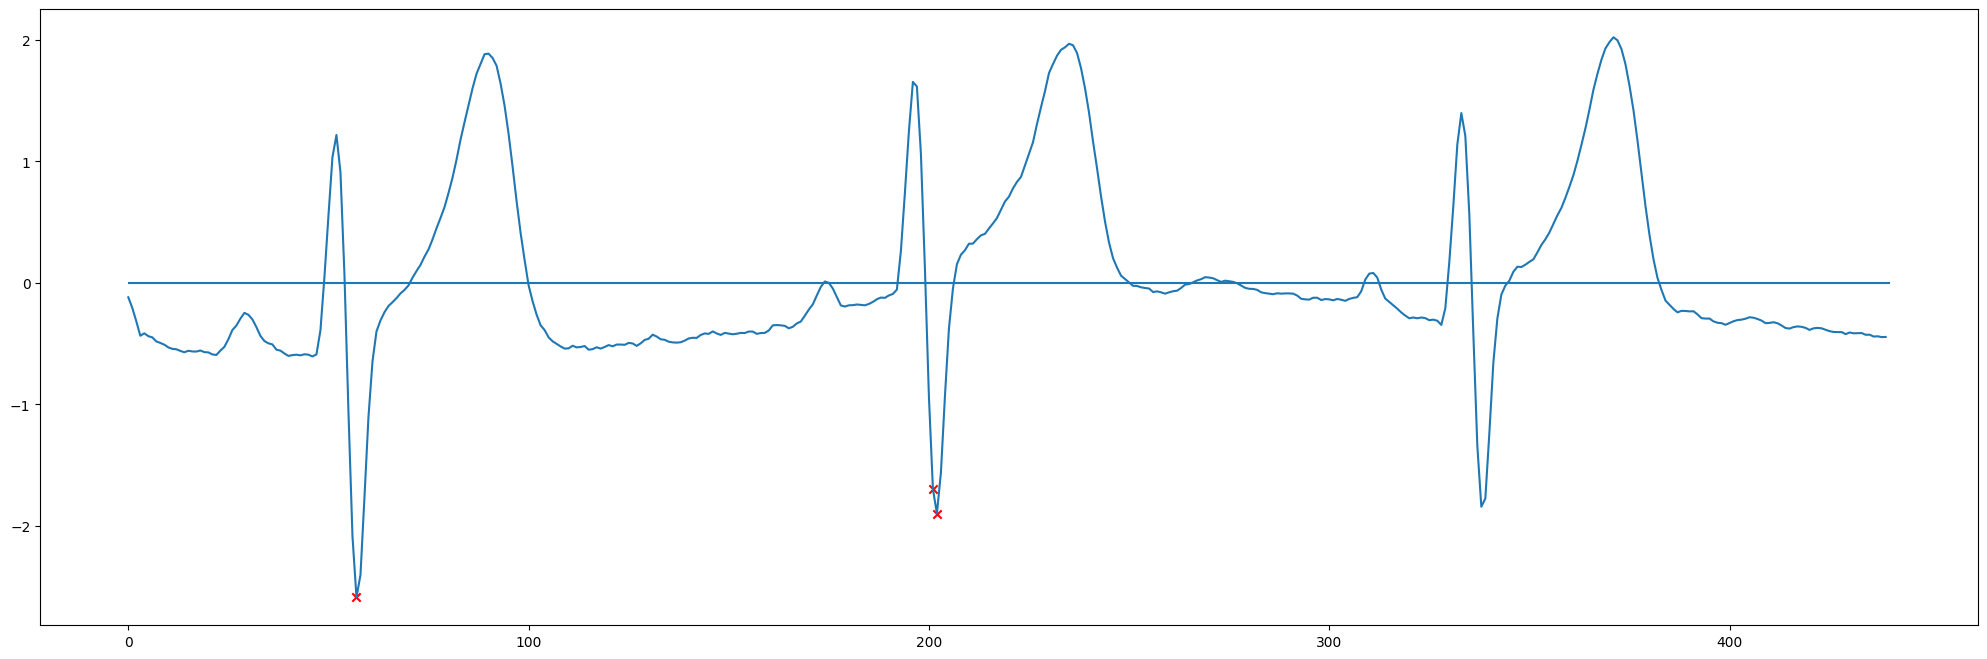

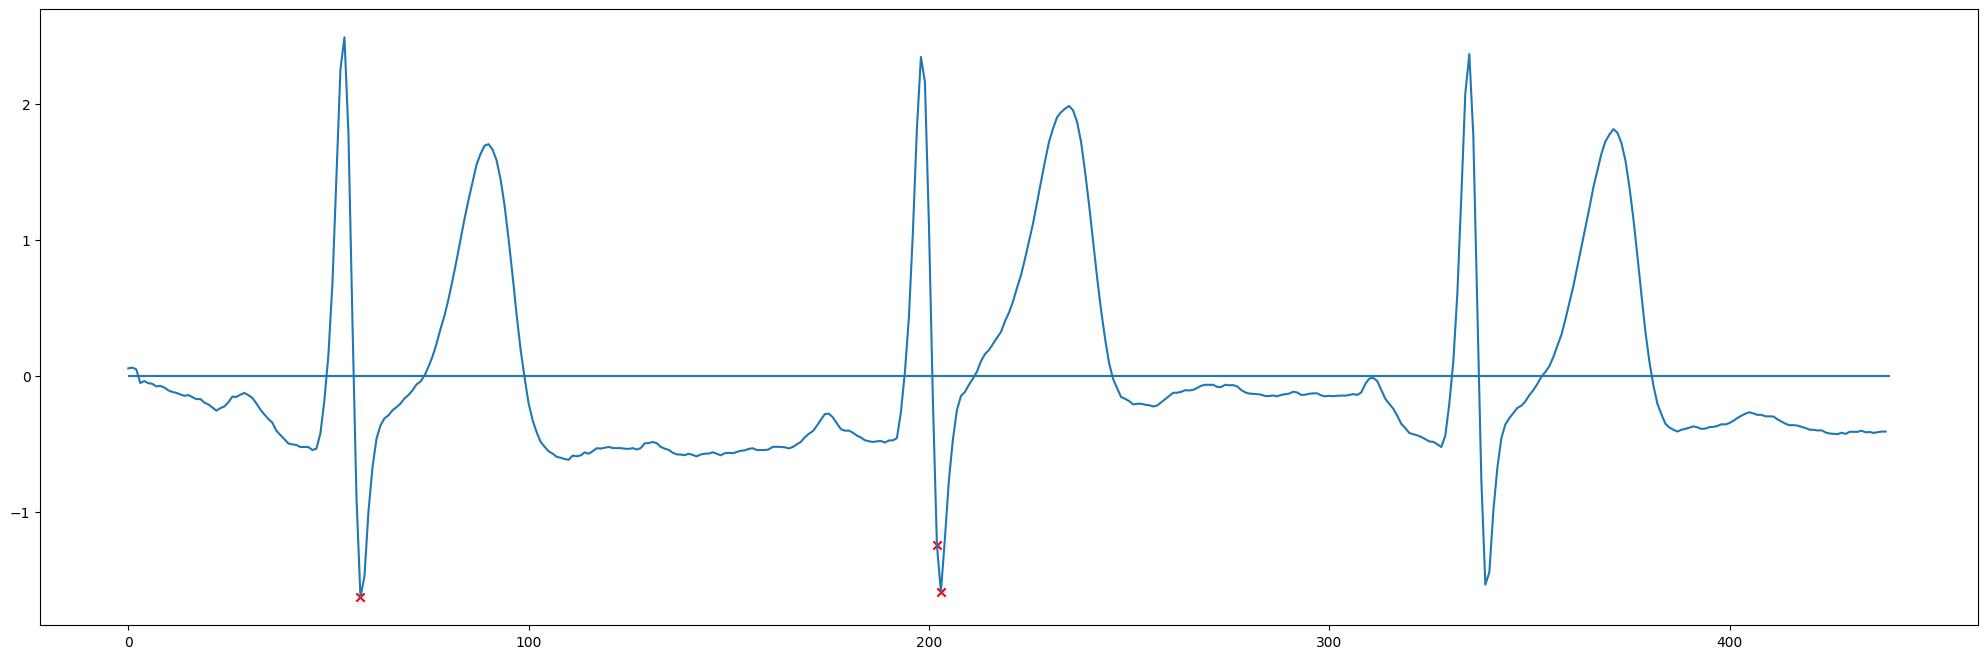

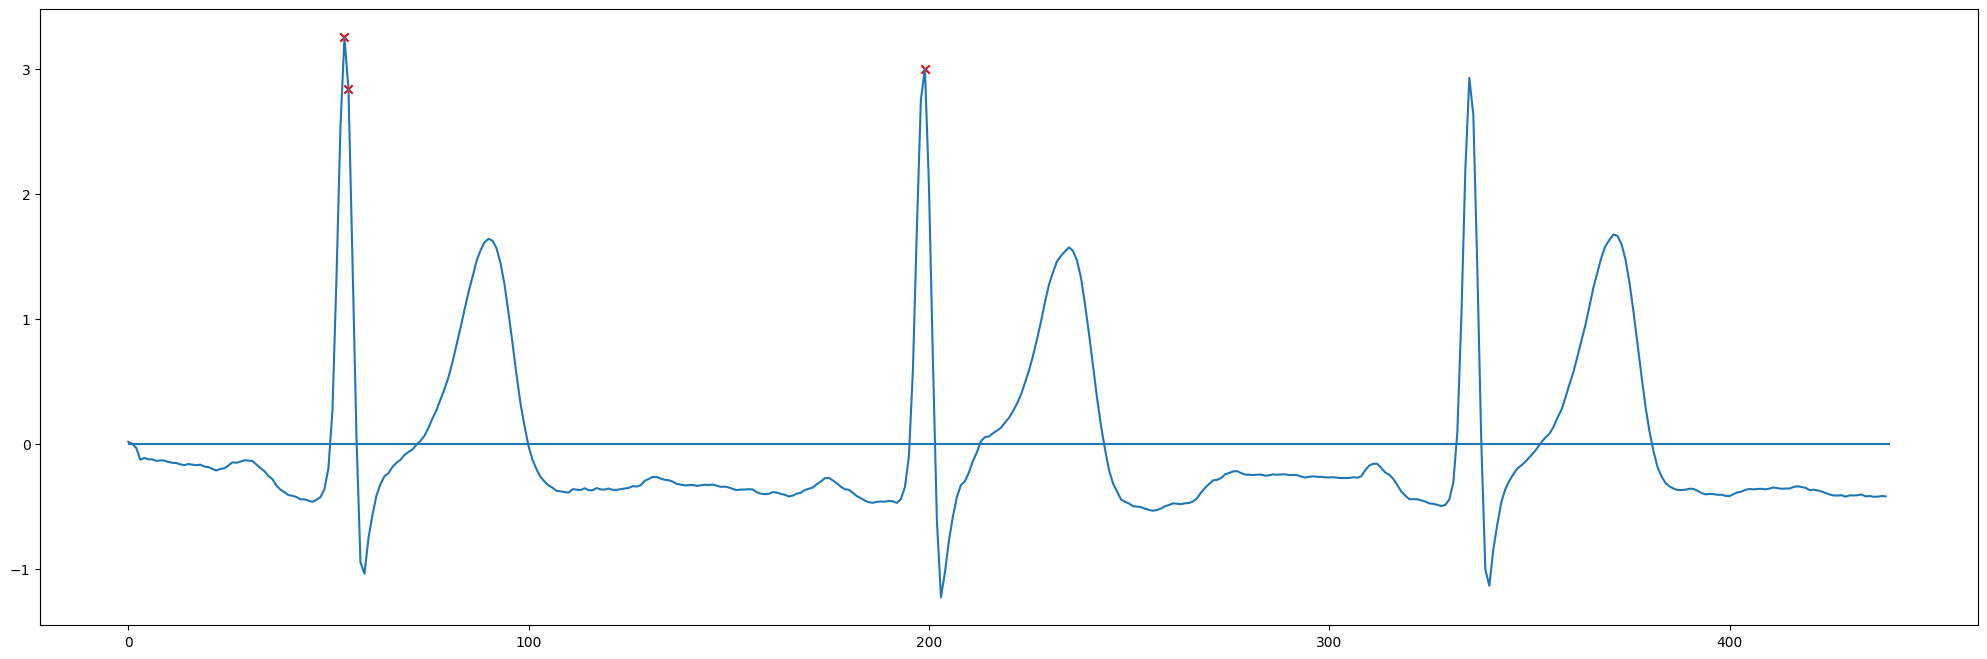

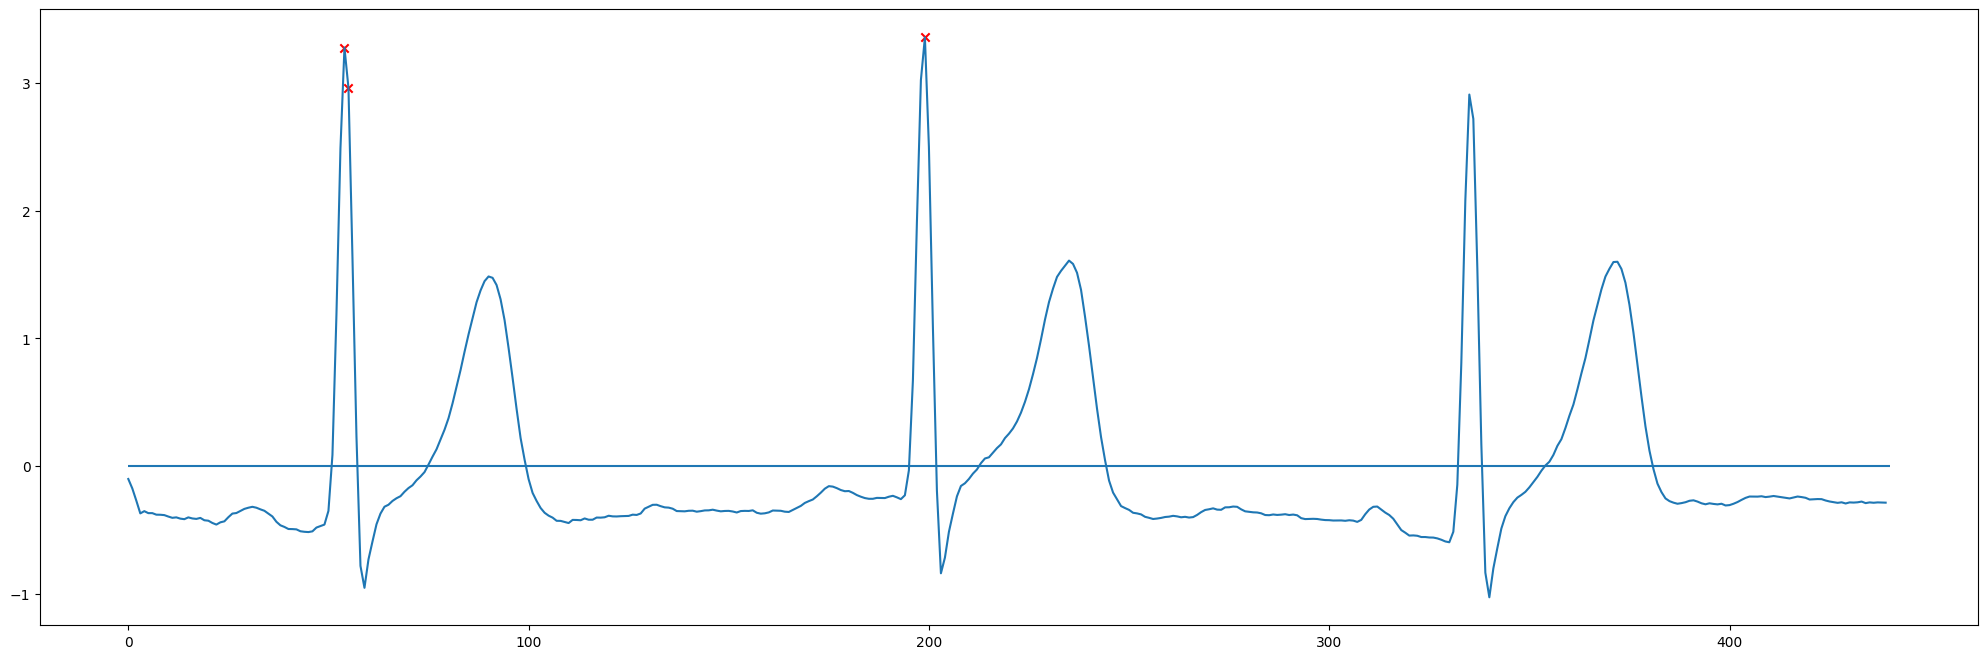

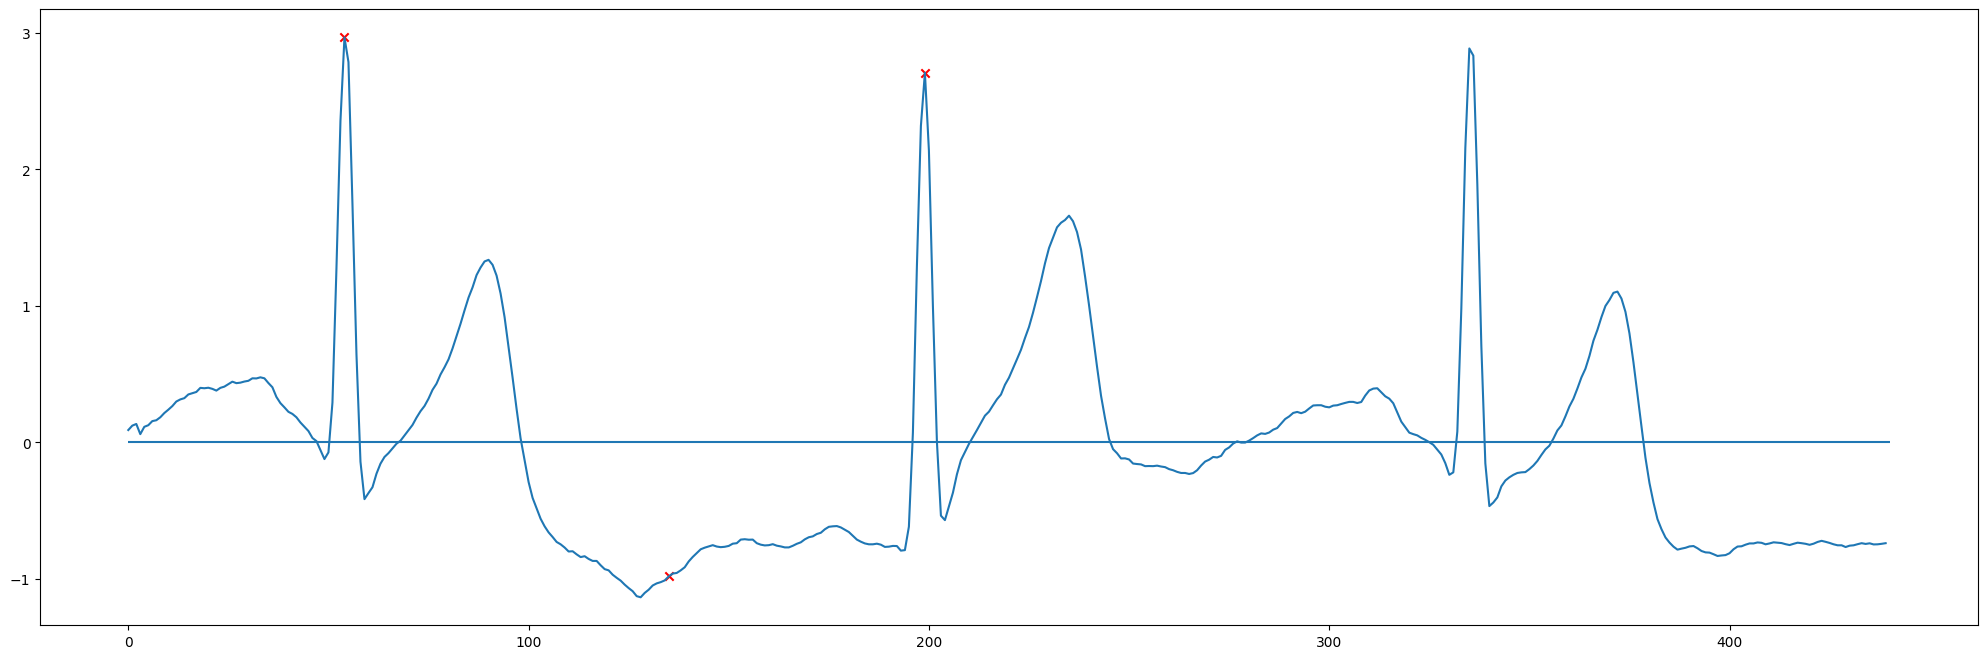

In [15]:
time = np.arange(fit_index)
for i in range(12):    
    difference = np.abs(Y[i][:fit_index] - rec3[i][:fit_index])
    threshold = np.percentile(difference, 99.5)
    # threshold=1.25
    
    isolated_peaks = np.where(difference > threshold, Y[i][:fit_index], 0)
    non_zero_indices = isolated_peaks != 0
    non_zero_times = time[non_zero_indices]
    non_zero_peaks = isolated_peaks[non_zero_indices]
    
    plt.figure(figsize=(25, 8))
    plt.plot(time, Y[i][:fit_index], '-', label='Original Signal')
    # plt.plot(time, rec3[i][:fit_index], '.-', label='Modeled Signal')
    plt.scatter(non_zero_times, non_zero_peaks, label='Isolated Peaks', marker='x', c="r")
    plt.hlines(0, 0, fit_index)